In [1]:
import uproot 
import argparse
import numpy as np
import matplotlib.pyplot as plt
import awkward as ak
from tqdm import tqdm

f='1k_10MeV_e_down_1pcWbLS.root'
print('Opening file:',f)

with uproot.open(f) as file:
    
    meta_tree=file['meta']
    output_tree=file['output']
    
    pmt_type=meta_tree['pmtType'].array() # 0=8" 2=12" 3=10"
    hit_time=output_tree['mcPEHitTime'].array() # Time photon hits PMT cathode
    fe_time=output_tree['mcPEFrontEndTime'].array() # Time photon reaches front end electronics
    pmt_id=output_tree['mcPMTID'].array() 
    pmt_npe=output_tree['mcPMTNPE'].array()
    
    hit_time=ak.flatten(hit_time)
    fe_time=ak.flatten(fe_time)
    pmt_id=ak.flatten(pmt_id)
    pmt_npe=ak.flatten(pmt_npe)
    pmt_type=ak.flatten(pmt_type)
    
    print('********************')
    print('id has',len(pmt_id),'entries',pmt_id)
    print('npe has',len(pmt_npe),'entries',pmt_npe)
    print('type has',len(pmt_type),'entries',pmt_type)
    print('hit time has',len(hit_time),'entries',hit_time)
    print('fe time has',len(fe_time),'entries',fe_time)
    print('********************')
    
    counter=0
    r14688_hit_time=[]
    r14688_fe_time=[]
    r14688_deltat=[]
    r11780_hit_time=[]
    r11780_fe_time=[]
    r11780_deltat=[]
    r7081_hit_time=[]
    r7081_fe_time=[]
    r7081_deltat=[]
    
    # Loop through id of all pmt that were hit
    for i in tqdm(range(len(pmt_id))):
        # Loop through each hit
        for j in range(pmt_npe[i]):
            # See if it is a 
            if (pmt_type[pmt_id[i]]==0):
                #print('pmt',pmt_id[i],'is type',pmt_type[pmt_id[i]],'and saw',pmt_npe[i],'at hit time',hit_time[counter],'and fe time',fe_time[counter])
                r14688_hit_time.append(hit_time[counter])
                r14688_fe_time.append(fe_time[counter])
                r14688_deltat.append(fe_time[counter]-hit_time[counter])
            # See if it is a 12" 
            elif (pmt_type[pmt_id[i]]==2):
                #print('pmt',pmt_id[i],'is type',pmt_type[pmt_id[i]],'and saw',pmt_npe[i],'at hit time',hit_time[counter],'and fe time',fe_time[counter])
                r11780_hit_time.append(hit_time[counter])
                r11780_fe_time.append(fe_time[counter])
                r11780_deltat.append(fe_time[counter]-hit_time[counter])
            # See if it is a 10"
            elif (pmt_type[pmt_id[i]]==3):
                #print('pmt',pmt_id[i],'is type',pmt_type[pmt_id[i]],'and saw',pmt_npe[i],'at hit time',hit_time[counter],'and fe time',fe_time[counter])
                r7081_hit_time.append(hit_time[counter])
                r7081_fe_time.append(fe_time[counter])
                r7081_deltat.append(fe_time[counter]-hit_time[counter])
            counter+=1

Opening file: 1k_10MeV_e_down_1pcWbLS.root
********************
id has 220441 entries [178, 206, 136, 113, 169, 187, 161, 194, ..., 11, 182, 7, 132, 24, 189, 138, 52]
npe has 220441 entries [4, 2, 8, 3, 2, 4, 2, 2, 4, 5, 5, 9, 6, ..., 3, 1, 3, 1, 2, 1, 2, 4, 1, 2, 1, 1]
type has 241 entries [0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, ..., 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
hit time has 780817 entries [6.18, 6.35, 9.24, 9.35, 6.72, 7.62, 5, ..., 13.8, 5.18, 6.73, 9.43, 5.56, 8.46]
fe time has 780817 entries [7.11, 6.13, 8.53, 9.46, 7.07, 8.35, ..., 13.6, 27.2, 6.8, 34.9, 5.79, 8.19]
********************


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 220441/220441 [00:32<00:00, 6739.75it/s]


Sum of probability is 0.9956028963196308


(1e-06, 1)

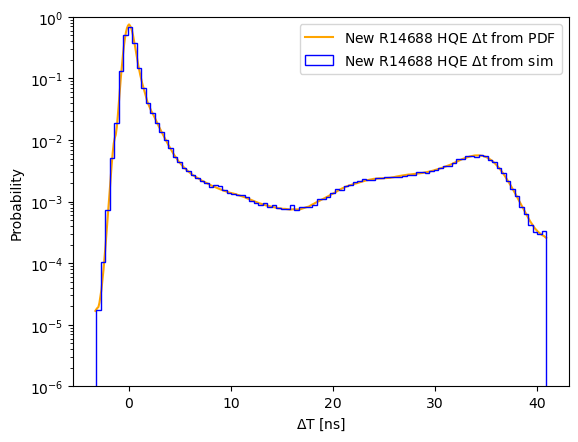

In [2]:
time_r14688=[-3.3, -3.2, -3.1, -3.0, -2.9, -2.8, -2.7, -2.6, -2.5, -2.4, -2.3, -2.2, -2.1, -2.0, -1.9, -1.8, -1.7, -1.6, -1.5, -1.4, -1.3, -1.2, -1.1, -1.0, -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1, 0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0, 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3.0, 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4.0, 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5.0, 5.1, 5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6.0, 6.1, 6.2, 6.3, 6.4, 6.5, 6.6, 6.7, 6.8, 6.9, 7.0, 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8, 7.9, 8.0, 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9.0, 9.1, 9.2, 9.3, 9.4, 9.5, 9.6, 9.7, 9.8, 9.9, 10.0, 10.1, 10.2, 10.3, 10.4, 10.5, 10.6, 10.7, 10.8, 10.9, 11.0, 11.1, 11.2, 11.3, 11.4, 11.5, 11.6, 11.7, 11.8, 11.9, 12.0, 12.1, 12.2, 12.3, 12.4, 12.5, 12.6, 12.7, 12.8, 12.9, 13.0, 13.1, 13.2, 13.3, 13.4, 13.5, 13.6, 13.7, 13.8, 13.9, 14.0, 14.1, 14.2, 14.3, 14.4, 14.5, 14.6, 14.7, 14.8, 14.9, 15.0, 15.1, 15.2, 15.3, 15.4, 15.5, 15.6, 15.7, 15.8, 15.9, 16.0, 16.1, 16.2, 16.3, 16.4, 16.5, 16.6, 16.7, 16.8, 16.9, 17.0, 17.1, 17.2, 17.3, 17.4, 17.5, 17.6, 17.7, 17.8, 17.9, 18.0, 18.1, 18.2, 18.3, 18.4, 18.5, 18.6, 18.7, 18.8, 18.9, 19.0, 19.1, 19.2, 19.3, 19.4, 19.5, 19.6, 19.7, 19.8, 19.9, 20.0, 20.1, 20.2, 20.3, 20.4, 20.5, 20.6, 20.7, 20.8, 20.9, 21.0, 21.1, 21.2, 21.3, 21.4, 21.5, 21.6, 21.7, 21.8, 21.9, 22.0, 22.1, 22.2, 22.3, 22.4, 22.5, 22.6, 22.7, 22.8, 22.9, 23.0, 23.1, 23.2, 23.3, 23.4, 23.5, 23.6, 23.7, 23.8, 23.9, 24.0, 24.1, 24.2, 24.3, 24.4, 24.5, 24.6, 24.7, 24.8, 24.9, 25.0, 25.1, 25.2, 25.3, 25.4, 25.5, 25.6, 25.7, 25.8, 25.9, 26.0, 26.1, 26.2, 26.3, 26.4, 26.5, 26.6, 26.7, 26.8, 26.9, 27.0, 27.1, 27.2, 27.3, 27.4, 27.5, 27.6, 27.7, 27.8, 27.9, 28.0, 28.1, 28.2, 28.3, 28.4, 28.5, 28.6, 28.7, 28.8, 28.9, 29.0, 29.1, 29.2, 29.3, 29.4, 29.5, 29.6, 29.7, 29.8, 29.9, 30.0, 30.1, 30.2, 30.3, 30.4, 30.5, 30.6, 30.7, 30.8, 30.9, 31.0, 31.1, 31.2, 31.3, 31.4, 31.5, 31.6, 31.7, 31.8, 31.9, 32.0, 32.1, 32.2, 32.3, 32.4, 32.5, 32.6, 32.7, 32.8, 32.9, 33.0, 33.1, 33.2, 33.3, 33.4, 33.5, 33.6, 33.7, 33.8, 33.9, 34.0, 34.1, 34.2, 34.3, 34.4, 34.5, 34.6, 34.7, 34.8, 34.9, 35.0, 35.1, 35.2, 35.3, 35.4, 35.5, 35.6, 35.7, 35.8, 35.9, 36.0, 36.1, 36.2, 36.3, 36.4, 36.5, 36.6, 36.7, 36.8, 36.9, 37.0, 37.1, 37.2, 37.3, 37.4, 37.5, 37.6, 37.7, 37.8, 37.9, 38.0, 38.1, 38.2, 38.3, 38.4, 38.5, 38.6, 38.7, 38.8, 38.9, 39.0, 39.1, 39.2, 39.3, 39.4, 39.5, 39.6, 39.7, 39.8, 39.9, 40.0, 40.1, 40.2, 40.3, 40.4, 40.5, 40.6, 40.7, 40.8, 40.9]
prob_r14688=[1.6870568166015462e-05, 1.7895312848035625e-05, 1.8792072815682306e-05, 1.9437423092301066e-05, 2.2760326577880582e-05, 2.9108406723830555e-05, 3.750914105828863e-05, 5.464368335690972e-05, 7.858560663539636e-05, 0.00012110941245672318, 0.00019356930282899573, 0.0003206051692458273, 0.0005230618195513058, 0.0008711307909405879, 0.0014540834330207919, 0.002395649701982189, 0.0039417833193587095, 0.00615488277722811, 0.008771508948405383, 0.010727174899353365, 0.012138161758415452, 0.016126421802575536, 0.024478217104629173, 0.03977285838824179, 0.06474193038617591, 0.10312070797452035, 0.15793903967216041, 0.23593327559878438, 0.3336486649882334, 0.4463479053176066, 0.5606061234612315, 0.6553651963718993, 0.7198906288920102, 0.7538713414201607, 0.7202344258155303, 0.6645318938396185, 0.5856122683871335, 0.49585966820629557, 0.405993474151043, 0.3254049272423339, 0.26028945051124586, 0.20809651211230318, 0.16697227831431447, 0.13679322617371026, 0.11421382061796474, 0.09678208731527072, 0.08280070580222186, 0.0720915402144788, 0.06261327774732782, 0.054627847501387806, 0.04819324771888373, 0.0420728122946627, 0.03806232208149538, 0.034845720900825, 0.032085015984690476, 0.029157347386726633, 0.027459048077433656, 0.025425537304004764, 0.023371714961826124, 0.021657373080940165, 0.019908181155208475, 0.018378353273224905, 0.016948254857597447, 0.0156796782701268, 0.014513160484031945, 0.013461532480770482, 0.012503752110680501, 0.011609184621967987, 0.010787760133694325, 0.01001692560839354, 0.009321909495212983, 0.008684793297436022, 0.008105415539199854, 0.007559753854481929, 0.007075834966635427, 0.0066153182684932895, 0.006197522099243076, 0.005823695432806662, 0.0054918620031052705, 0.005193056118451743, 0.004922039511404154, 0.00466006744029606, 0.004428985428533645, 0.004230278113948919, 0.0040458955646324474, 0.0038658992680675225, 0.003721369806869502, 0.0035729536020180502, 0.0034435727399577897, 0.003320417187075755, 0.0032122324153430423, 0.0031157671414781735, 0.0030159342392423174, 0.0029184655966184394, 0.002826715187236883, 0.002746081160720328, 0.002671836485866886, 0.0026103042008931003, 0.002536465628393433, 0.002491825805413326, 0.0024319634235294516, 0.002368395300378869, 0.002314288553996127, 0.0022608702529095786, 0.002214430716800814, 0.0021640198994066166, 0.0021249842677751106, 0.0020855607655158185, 0.0020512304835869845, 0.00201091860643965, 0.0019689312144389884, 0.001926976886333672, 0.0018876478879011494, 0.0018536451788204909, 0.0018172848204477475, 0.0017940148587643745, 0.0017628158613204675, 0.0017368634129855875, 0.001708940851066185, 0.0016793576532203572, 0.001649884022436628, 0.0016229831224784217, 0.0015921479545577273, 0.0015640696730282561, 0.0015472141929749837, 0.0015269858942105704, 0.0015124101488275825, 0.0014904911248422516, 0.0014737054999523838, 0.0014530365961846876, 0.0014320635741166868, 0.0014099189619604594, 0.0013924182693257502, 0.0013816750958618223, 0.001370238380014877, 0.001357481201442254, 0.0013410385561604557, 0.001331872113236111, 0.0013176954637705608, 0.0012962645588813313, 0.0012786231715968327, 0.0012617757733484687, 0.001247448680940746, 0.0012298885934190708, 0.0012137873853932566, 0.0012013857819510754, 0.0011865599833936237, 0.0011692994758849085, 0.0011472800273208948, 0.0011268570255011027, 0.0011112711578016034, 0.0010986672487607032, 0.00108001744105935, 0.0010642672825180634, 0.0010439662004898913, 0.0010276500051204424, 0.0010126032502013038, 0.0009954539027755124, 0.000979717682792375, 0.0009674435810851292, 0.0009488721936355362, 0.0009386285775072086, 0.0009280003468628628, 0.0009214647004322606, 0.0009102767730833939, 0.0008977298946986594, 0.0008817175759727112, 0.0008710791722248019, 0.0008662959697984359, 0.0008595707833069196, 0.0008506757913234273, 0.0008395911414689653, 0.0008327470978621213, 0.000828041725493288, 0.0008176814553613468, 0.0008116452854688064, 0.000805624796565684, 0.0007981041483356795, 0.0007886042330864125, 0.0007831039143306317, 0.0007820316923227844, 0.0007781975750432034, 0.0007735092143123675, 0.0007671691492112441, 0.0007637604057064517, 0.0007645438632041769, 0.0007633684168977653, 0.0007593808048057032, 0.0007550756487261125, 0.0007530281989018428, 0.0007506603314817037, 0.0007439185044636414, 0.0007445196261597508, 0.0007486207001637176, 0.0007531597510043103, 0.0007494674795382287, 0.0007486916787136677, 0.0007467609673370826, 0.0007469898403907145, 0.000749487419762136, 0.000746821743518583, 0.000752694386813539, 0.0007620264823029003, 0.0007700155343413642, 0.0007793543264810199, 0.0007934613038549835, 0.0008047692318131935, 0.0008147029970586464, 0.0008214654208565074, 0.0008291285964583834, 0.0008455299881682128, 0.0008664735571676344, 0.0008873715140755479, 0.0009029636884686906, 0.0009187803713868183, 0.0009418949325670204, 0.0009619715964654775, 0.0009796870952291177, 0.0009993737574745518, 0.0010201112391221966, 0.0010377833678862107, 0.0010637180711128, 0.001080548560544481, 0.001100970639540399, 0.0011229966867761264, 0.0011471806754193693, 0.0011714440829152023, 0.0011926274758570124, 0.0012178580907152713, 0.001246359405058994, 0.0012778619906345073, 0.0012995534918738556, 0.001326166423872337, 0.001353261885266576, 0.0013832559852042902, 0.0014142581203288652, 0.001441446140204665, 0.0014779194138018553, 0.0015123587934077912, 0.0015466821812578759, 0.0015788208238951152, 0.0016064262989610696, 0.0016414558215623045, 0.0016707456933235407, 0.0017006106600020467, 0.0017222942638340855, 0.0017553944055140487, 0.0017874096163821745, 0.0018150447474311311, 0.0018296909254618692, 0.0018481893181658345, 0.0018738188221655526, 0.0018998604641607749, 0.0019255613904864434, 0.0019441579003320747, 0.0019626820587311097, 0.001987609737792186, 0.0020055023081447655, 0.0020320165693393623, 0.002059740826362993, 0.00208449156058091, 0.002103945364023423, 0.0021252161810545265, 0.002143615898239726, 0.00217225484679554, 0.002203561400592112, 0.002220470995419135, 0.0022357135790757655, 0.002254869514141962, 0.002279173800327955, 0.0022986328255202235, 0.0023110449482928353, 0.002331323928075116, 0.00234479283480626, 0.0023490672774698043, 0.0023533906350859655, 0.002364230044058531, 0.002373760562463628, 0.002381155573941458, 0.0023818482574029624, 0.002381603530188987, 0.0023881053025643084, 0.0024026932033585913, 0.0024018615601063722, 0.0024068351027013634, 0.0024131125039272023, 0.00241727516293303, 0.002426443377176178, 0.0024281714643234593, 0.0024390361935251277, 0.0024616822222812028, 0.0024736602687672835, 0.002480331118278645, 0.002505871729099419, 0.002533713741696322, 0.0025512638458978594, 0.0025720731191129897, 0.002586611190557526, 0.0026136148785707797, 0.0026244624406721803, 0.002641164005168709, 0.0026562045820814335, 0.002675981783988001, 0.002694709162256488, 0.0027184588650224256, 0.002724575390502592, 0.002737664600961956, 0.0027546450939309112, 0.0027551774269071205, 0.002769373899775467, 0.002784114339497428, 0.0027975440425281333, 0.0028046831925246404, 0.0028148549233542003, 0.002831766384169058, 0.0028446620558048794, 0.002857537981468674, 0.002862911467001367, 0.002877123297266652, 0.0028853778387553475, 0.0029011072976259248, 0.002927453571151577, 0.002948919941938378, 0.0029766051604201292, 0.002987064441577566, 0.0030039019919654453, 0.0030324948591396424, 0.0030583466389225546, 0.003089727351918643, 0.0031190481998607275, 0.0031445312194554507, 0.0031896362413692163, 0.0032254842143852012, 0.0032641649847381824, 0.0033022934787652865, 0.0033422330505777295, 0.0033650726463492734, 0.0034053102205425937, 0.0034496142075198855, 0.003496795833678032, 0.0035468871086288007, 0.003582820992410371, 0.0036338492710441647, 0.0036867781573885904, 0.0037389457689896146, 0.0037943047452012493, 0.0038514373200321554, 0.003909264835959142, 0.0039770544024157715, 0.004049292243292374, 0.004116588909116633, 0.004208940792992932, 0.004278765701964565, 0.00435525211172742, 0.004439152643458144, 0.004519582711932889, 0.004604066139578448, 0.004684588474521245, 0.00475659442062483, 0.004844153291856774, 0.0049352092983477045, 0.005001887630804543, 0.005089846178062807, 0.005150345957709317, 0.005216727919966247, 0.0052893834699529125, 0.005339899334659153, 0.0053986305515749105, 0.005454867551351194, 0.005494218438768901, 0.005540584404902889, 0.005583261359503795, 0.005622309335139655, 0.005635335856392171, 0.005639748769767326, 0.005638169523487058, 0.005641678810121328, 0.005614620039829136, 0.005598265766593933, 0.005559349173246953, 0.005511448826294744, 0.005451391025480016, 0.00538303702745562, 0.005298234043301789, 0.005207101636493388, 0.005098104066223196, 0.0049758964003206235, 0.004847942817556965, 0.004729096151680498, 0.004589149459291732, 0.004438720145905977, 0.00428250908471645, 0.004129611215253662, 0.003966249894442178, 0.003802240487214921, 0.0036342791001570712, 0.0034760644716826158, 0.003310538120385872, 0.0031409736309119334, 0.0029891197465497306, 0.0028332473542757868, 0.0026811998250668833, 0.00252151121094, 0.0023705381359297143, 0.0022321186270218454, 0.0021023475115198448, 0.0019755006209239466, 0.0018458350190424214, 0.0017278252643812997, 0.001617538191342652, 0.001513925777456917, 0.0014117802118060912, 0.001315791134538026, 0.0012291009597467542, 0.0011406446568085872, 0.0010589969105633526, 0.0009848381881276652, 0.000918869219695784, 0.000857914219376414, 0.0007998145452300584, 0.0007421058736545815, 0.0006899374348286117, 0.0006455493814575954, 0.0006010961590429967, 0.0005595216620629456, 0.0005198084955323919, 0.0004861484959702822, 0.00045853940283994217, 0.0004337884951754891, 0.00040753374751584633, 0.00038596078592903965, 0.00036623359708723343, 0.000351211794028316, 0.00033680273877899217, 0.00032282086496808037, 0.0003128704527435759, 0.00030287993901024503, 0.0002949324510501156, 0.00028636113407354215, 0.0002807812460366062, 0.0002746077756710264, 0.00026506040951779507, 0.00025778135861492633]

for i in range(len(prob_r14688)):
    prob_r14688[i]=prob_r14688[i]
    
sum=0
for i in prob_r14688:
    sum+=i*0.1 #multiply by bin width
print('Sum of probability is',sum)

plt.plot(time_r14688,prob_r14688,label='New R14688 HQE $\Delta$t from PDF',color='orange')
plt.hist(r14688_deltat,bins=100,density=True,histtype='step',color='blue',label='New R14688 HQE $\Delta$t from sim');
plt.ylabel('Probability')
plt.xlabel('$\Delta$T [ns]')
plt.yscale('log')
plt.legend()
plt.ylim(1e-6,1)

Sum of probability is 1.0


(1e-06, 1)

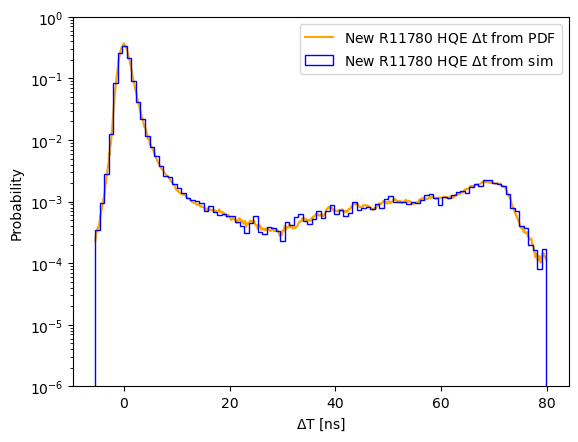

In [3]:
time_r11780=[-5.4, -5.3, -5.2, -5.1, -5.0, -4.9, -4.8, -4.7, -4.6, -4.5, -4.4, -4.3, -4.2, -4.1, -4.0, -3.9, -3.8, -3.7, -3.6, -3.5, -3.4, -3.3, -3.2, -3.1, -3.0, -2.9, -2.8, -2.7, -2.6, -2.5, -2.4, -2.3, -2.2, -2.1, -2.0, -1.9, -1.8, -1.7, -1.6, -1.5, -1.4, -1.3, -1.2, -1.1, -1.0, -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1, 0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0, 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3.0, 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4.0, 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5.0, 5.1, 5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6.0, 6.1, 6.2, 6.3, 6.4, 6.5, 6.6, 6.7, 6.8, 6.9, 7.0, 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8, 7.9, 8.0, 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9.0, 9.1, 9.2, 9.3, 9.4, 9.5, 9.6, 9.7, 9.8, 9.9, 10.0, 10.1, 10.2, 10.3, 10.4, 10.5, 10.6, 10.7, 10.8, 10.9, 11.0, 11.1, 11.2, 11.3, 11.4, 11.5, 11.6, 11.7, 11.8, 11.9, 12.0, 12.1, 12.2, 12.3, 12.4, 12.5, 12.6, 12.7, 12.8, 12.9, 13.0, 13.1, 13.2, 13.3, 13.4, 13.5, 13.6, 13.7, 13.8, 13.9, 14.0, 14.1, 14.2, 14.3, 14.4, 14.5, 14.6, 14.7, 14.8, 14.9, 15.0, 15.1, 15.2, 15.3, 15.4, 15.5, 15.6, 15.7, 15.8, 15.9, 16.0, 16.1, 16.2, 16.3, 16.4, 16.5, 16.6, 16.7, 16.8, 16.9, 17.0, 17.1, 17.2, 17.3, 17.4, 17.5, 17.6, 17.7, 17.8, 17.9, 18.0, 18.1, 18.2, 18.3, 18.4, 18.5, 18.6, 18.7, 18.8, 18.9, 19.0, 19.1, 19.2, 19.3, 19.4, 19.5, 19.6, 19.7, 19.8, 19.9, 20.0, 20.1, 20.2, 20.3, 20.4, 20.5, 20.6, 20.7, 20.8, 20.9, 21.0, 21.1, 21.2, 21.3, 21.4, 21.5, 21.6, 21.7, 21.8, 21.9, 22.0, 22.1, 22.2, 22.3, 22.4, 22.5, 22.6, 22.7, 22.8, 22.9, 23.0, 23.1, 23.2, 23.3, 23.4, 23.5, 23.6, 23.7, 23.8, 23.9, 24.0, 24.1, 24.2, 24.3, 24.4, 24.5, 24.6, 24.7, 24.8, 24.9, 25.0, 25.1, 25.2, 25.3, 25.4, 25.5, 25.6, 25.7, 25.8, 25.9, 26.0, 26.1, 26.2, 26.3, 26.4, 26.5, 26.6, 26.7, 26.8, 26.9, 27.0, 27.1, 27.2, 27.3, 27.4, 27.5, 27.6, 27.7, 27.8, 27.9, 28.0, 28.1, 28.2, 28.3, 28.4, 28.5, 28.6, 28.7, 28.8, 28.9, 29.0, 29.1, 29.2, 29.3, 29.4, 29.5, 29.6, 29.7, 29.8, 29.9, 30.0, 30.1, 30.2, 30.3, 30.4, 30.5, 30.6, 30.7, 30.8, 30.9, 31.0, 31.1, 31.2, 31.3, 31.4, 31.5, 31.6, 31.7, 31.8, 31.9, 32.0, 32.1, 32.2, 32.3, 32.4, 32.5, 32.6, 32.7, 32.8, 32.9, 33.0, 33.1, 33.2, 33.3, 33.4, 33.5, 33.6, 33.7, 33.8, 33.9, 34.0, 34.1, 34.2, 34.3, 34.4, 34.5, 34.6, 34.7, 34.8, 34.9, 35.0, 35.1, 35.2, 35.3, 35.4, 35.5, 35.6, 35.7, 35.8, 35.9, 36.0, 36.1, 36.2, 36.3, 36.4, 36.5, 36.6, 36.7, 36.8, 36.9, 37.0, 37.1, 37.2, 37.3, 37.4, 37.5, 37.6, 37.7, 37.8, 37.9, 38.0, 38.1, 38.2, 38.3, 38.4, 38.5, 38.6, 38.7, 38.8, 38.9, 39.0, 39.1, 39.2, 39.3, 39.4, 39.5, 39.6, 39.7, 39.8, 39.9, 40.0, 40.1, 40.2, 40.3, 40.4, 40.5, 40.6, 40.7, 40.8, 40.9, 41.0, 41.1, 41.2, 41.3, 41.4, 41.5, 41.6, 41.7, 41.8, 41.9, 42.0, 42.1, 42.2, 42.3, 42.4, 42.5, 42.6, 42.7, 42.8, 42.9, 43.0, 43.1, 43.2, 43.3, 43.4, 43.5, 43.6, 43.7, 43.8, 43.9, 44.0, 44.1, 44.2, 44.3, 44.4, 44.5, 44.6, 44.7, 44.8, 44.9, 45.0, 45.1, 45.2, 45.3, 45.4, 45.5, 45.6, 45.7, 45.8, 45.9, 46.0, 46.1, 46.2, 46.3, 46.4, 46.5, 46.6, 46.7, 46.8, 46.9, 47.0, 47.1, 47.2, 47.3, 47.4, 47.5, 47.6, 47.7, 47.8, 47.9, 48.0, 48.1, 48.2, 48.3, 48.4, 48.5, 48.6, 48.7, 48.8, 48.9, 49.0, 49.1, 49.2, 49.3, 49.4, 49.5, 49.6, 49.7, 49.8, 49.9, 50.0, 50.1, 50.2, 50.3, 50.4, 50.5, 50.6, 50.7, 50.8, 50.9, 51.0, 51.1, 51.2, 51.3, 51.4, 51.5, 51.6, 51.7, 51.8, 51.9, 52.0, 52.1, 52.2, 52.3, 52.4, 52.5, 52.6, 52.7, 52.8, 52.9, 53.0, 53.1, 53.2, 53.3, 53.4, 53.5, 53.6, 53.7, 53.8, 53.9, 54.0, 54.1, 54.2, 54.3, 54.4, 54.5, 54.6, 54.7, 54.8, 54.9, 55.0, 55.1, 55.2, 55.3, 55.4, 55.5, 55.6, 55.7, 55.8, 55.9, 56.0, 56.1, 56.2, 56.3, 56.4, 56.5, 56.6, 56.7, 56.8, 56.9, 57.0, 57.1, 57.2, 57.3, 57.4, 57.5, 57.6, 57.7, 57.8, 57.9, 58.0, 58.1, 58.2, 58.3, 58.4, 58.5, 58.6, 58.7, 58.8, 58.9, 59.0, 59.1, 59.2, 59.3, 59.4, 59.5, 59.6, 59.7, 59.8, 59.9, 60.0, 60.1, 60.2, 60.3, 60.4, 60.5, 60.6, 60.7, 60.8, 60.9, 61.0, 61.1, 61.2, 61.3, 61.4, 61.5, 61.6, 61.7, 61.8, 61.9, 62.0, 62.1, 62.2, 62.3, 62.4, 62.5, 62.6, 62.7, 62.8, 62.9, 63.0, 63.1, 63.2, 63.3, 63.4, 63.5, 63.6, 63.7, 63.8, 63.9, 64.0, 64.1, 64.2, 64.3, 64.4, 64.5, 64.6, 64.7, 64.8, 64.9, 65.0, 65.1, 65.2, 65.3, 65.4, 65.5, 65.6, 65.7, 65.8, 65.9, 66.0, 66.1, 66.2, 66.3, 66.4, 66.5, 66.6, 66.7, 66.8, 66.9, 67.0, 67.1, 67.2, 67.3, 67.4, 67.5, 67.6, 67.7, 67.8, 67.9, 68.0, 68.1, 68.2, 68.3, 68.4, 68.5, 68.6, 68.7, 68.8, 68.9, 69.0, 69.1, 69.2, 69.3, 69.4, 69.5, 69.6, 69.7, 69.8, 69.9, 70.0, 70.1, 70.2, 70.3, 70.4, 70.5, 70.6, 70.7, 70.8, 70.9, 71.0, 71.1, 71.2, 71.3, 71.4, 71.5, 71.6, 71.7, 71.8, 71.9, 72.0, 72.1, 72.2, 72.3, 72.4, 72.5, 72.6, 72.7, 72.8, 72.9, 73.0, 73.1, 73.2, 73.3, 73.4, 73.5, 73.6, 73.7, 73.8, 73.9, 74.0, 74.1, 74.2, 74.3, 74.4, 74.5, 74.6, 74.7, 74.8, 74.9, 75.0, 75.1, 75.2, 75.3, 75.4, 75.5, 75.6, 75.7, 75.8, 75.9, 76.0, 76.1, 76.2, 76.3, 76.4, 76.5, 76.6, 76.7, 76.8, 76.9, 77.0, 77.1, 77.2, 77.3, 77.4, 77.5, 77.6, 77.7, 77.8, 77.9, 78.0, 78.1, 78.2, 78.3, 78.4, 78.5, 78.6, 78.7, 78.8, 78.9, 79.0, 79.1, 79.2, 79.3, 79.4, 79.5, 79.6, 79.7, 79.8, 79.9]
prob_r11780=[0.00022875960896446364, 0.0002752127194411176, 0.00030483846385966404, 0.0003260907380456444, 0.0003553217458563077, 0.000383333328403858, 0.00036971648858923767, 0.0004175513253371159, 0.00046859586802789054, 0.000551941970702967, 0.0006162657058609088, 0.0006576400644440142, 0.0007295041511166324, 0.0008131779952280341, 0.0009327007290543959, 0.0010798488705365094, 0.001169390506340247, 0.001334942680138931, 0.0014899962477361228, 0.0017907859252117772, 0.002003917156397529, 0.002496294629197077, 0.0028152884570571243, 0.0033252913740464372, 0.0038346524273091477, 0.004341102699442353, 0.006128248015453699, 0.005691589878399846, 0.007671935978660874, 0.008314819554644727, 0.009947047536425065, 0.01313795401793562, 0.018332746816126514, 0.021620495756231047, 0.027321333977385977, 0.03603237261059601, 0.044905129606468676, 0.05809219438125826, 0.06657936618197027, 0.08403698526668434, 0.10105183345605404, 0.11959534517821559, 0.13909939228170098, 0.16499937169291756, 0.19301794241693776, 0.21417549351198342, 0.2414673972253948, 0.2580381641214764, 0.28889471610746886, 0.3057521050253925, 0.3235824306102962, 0.33766922285226, 0.34930525682733304, 0.35292087445705705, 0.3732924892400408, 0.3523600113737356, 0.34457781251460085, 0.3359418450581886, 0.3197761659147683, 0.31002245834590814, 0.2867789948239898, 0.2712697315555463, 0.25107644506241533, 0.23204430702078852, 0.2092893165727922, 0.194074489861591, 0.17452040421794368, 0.15482229291865635, 0.1417343676499133, 0.13219793715702952, 0.11348551755448405, 0.10147265742136835, 0.09309035518734896, 0.08379457067162353, 0.0769427976569505, 0.07081574107401985, 0.06375094945139403, 0.060295461311406784, 0.05493750287616619, 0.04917509948397182, 0.04484857531492663, 0.04267262859342467, 0.036952676441716126, 0.03588880963075681, 0.03173990197606954, 0.03002030742057526, 0.0270313345551043, 0.02621662371951526, 0.02273951099901449, 0.022880638177391447, 0.02052681625036244, 0.01838667542197597, 0.016645290532589344, 0.016205548168375546, 0.01594769176693016, 0.01519934877162417, 0.014381495769279065, 0.012801262240973697, 0.012767772861413762, 0.010341499504275691, 0.010553801447262022, 0.011066375205872505, 0.010202586587990888, 0.008554023121757898, 0.008679428353276059, 0.008078067717226675, 0.007634462081900873, 0.007636309581303646, 0.00748421884964677, 0.00679833631352277, 0.0066265114032819285, 0.00619912973942888, 0.0060790383630482244, 0.005725723565815027, 0.005379769639463766, 0.0051873129821451884, 0.004903774243042891, 0.004694375968517566, 0.004515249880095797, 0.004259515848519269, 0.004079004672455314, 0.004003147564436236, 0.0038779559261978144, 0.003681935944605646, 0.003516011887361785, 0.00345773337457174, 0.003346890406178998, 0.0033223541599486962, 0.0032153461969668478, 0.003131039371850841, 0.0030054496485962877, 0.0029209287723319915, 0.002863918200914711, 0.0027953471261479004, 0.002717391601147777, 0.0026708033029036577, 0.0026310827644440023, 0.0025883705944555187, 0.002492254556368196, 0.002441161452925005, 0.002384910995224376, 0.0023246964134477975, 0.0021994991786797907, 0.002175875934812525, 0.0020891246650255463, 0.002075717195614625, 0.0020483282247512457, 0.001990063480369939, 0.0019138545287920407, 0.0018754373543236735, 0.001796850102367146, 0.0017251445623632329, 0.001625143180518296, 0.0015599170155068019, 0.0015566614537596646, 0.001522665667196429, 0.001461885365348762, 0.0014816050308894882, 0.0014517086572439324, 0.0014281913841583242, 0.0013798288186748036, 0.0013491695606533947, 0.0013576933199400956, 0.0013617956871716992, 0.0013247545672804425, 0.0012957220836901154, 0.0012981180714169472, 0.0013279223624975242, 0.001325138338433548, 0.001295814547843341, 0.001260008674293708, 0.0012307702160377913, 0.001189602327514919, 0.0011614869091397014, 0.0011449992817832678, 0.0011348999220545492, 0.001135286075920472, 0.0011194160736100291, 0.0010995240550150083, 0.0010902386442324676, 0.001060489072724413, 0.0010338994485973863, 0.001000541907581237, 0.000979682623933436, 0.0009722477664135033, 0.0009725292951327071, 0.0009795953723946461, 0.0009532045283006858, 0.0009460155422484437, 0.0009487020589420409, 0.0009307413676860481, 0.0009275471544218036, 0.0008923279132989465, 0.0008800381529967803, 0.0008920970928736921, 0.0009038877855777493, 0.0008895980089256923, 0.0008733993470985438, 0.0008497717368684295, 0.000838159325498949, 0.0008566452607278655, 0.0008198419681783735, 0.0008323163410894863, 0.0008387453343231792, 0.0008213569327436062, 0.0007991544202389017, 0.0007859841828775194, 0.0007734258104118095, 0.0007823045551610304, 0.0007510448735520301, 0.0007382136523697176, 0.0007677434657631118, 0.0007315984678643719, 0.0007635197546942881, 0.0007818701353922073, 0.0007604222395769475, 0.0007601977684974714, 0.000727933023279927, 0.0007220301505174527, 0.0007164812502637644, 0.0007231014987218421, 0.0007387984197496735, 0.0007250910862994153, 0.0007015091206597268, 0.0007235151989498517, 0.0007226406932670926, 0.0006846979738595137, 0.0007227909105603905, 0.0007132434364052115, 0.000704447149479213, 0.000702655659029039, 0.000703414526048838, 0.0006914599812111356, 0.0006927743541910637, 0.0007500419774400081, 0.0007313521961442817, 0.0006792357625309901, 0.0006890400503685438, 0.0006978575520152032, 0.0006838058804433509, 0.0006593570785888821, 0.0006715991615380835, 0.0006647098837426375, 0.0006563565249370208, 0.0006226912958791083, 0.0006350499487979759, 0.000609998364113431, 0.0005811309084340189, 0.0006102102313334679, 0.0005640527940875141, 0.0005897824084791965, 0.0006149875251754811, 0.0006013760693118995, 0.0005851315524415687, 0.000554519047421342, 0.0005512119013584776, 0.000520067489532531, 0.0005031910343112916, 0.0005196134160430411, 0.0005314333284396714, 0.000515445456313932, 0.0005430091445475636, 0.0005294515076013487, 0.0005263791418940548, 0.0005243553050737369, 0.0005000951908902342, 0.00048805457474617386, 0.0004636430224053249, 0.00044823132427822363, 0.0004893474703243822, 0.0005094347808183922, 0.0005020316648212757, 0.0005374535110413658, 0.0005363790272188663, 0.000508032661382103, 0.0004845828667398695, 0.00047601776627269934, 0.0005015647671176739, 0.0004837407143136421, 0.00044914411608588207, 0.00044066250075451585, 0.0004407781827270419, 0.00045656523528910296, 0.0004878569478649916, 0.00045101668867639623, 0.00039056786437264353, 0.00041044075546916496, 0.0004283147138475438, 0.00044678668999433637, 0.00043616131267403723, 0.00044423192274232483, 0.00043428226650151045, 0.0004911032084134612, 0.00048133860819182876, 0.0004884317395965681, 0.0004829975168664742, 0.00047854382811349147, 0.0004618646780947624, 0.00045157977152251576, 0.00048576091480299606, 0.0004948733372380671, 0.0004648054503811341, 0.00043290246420208783, 0.00041133443913037596, 0.0004130305997703121, 0.0004143990428979105, 0.00041443410916216947, 0.0003617480278543637, 0.00038617901983701203, 0.00039021109321127817, 0.0003921102346978552, 0.00041427626631470406, 0.0004074072134891373, 0.0003826585622447964, 0.00034828365620292453, 0.000351528296089565, 0.00037306357845161677, 0.00036045588929376046, 0.00034852922379473907, 0.0003639085622207635, 0.0003435972406509285, 0.00035396702168770687, 0.0003692542837102889, 0.0003514352902698757, 0.0003518001940785386, 0.00035110455265577117, 0.00036994713684562454, 0.0003597938024428139, 0.0003496889594168992, 0.00034503395592413126, 0.0003429182016161128, 0.0003317191623316621, 0.00033602930105269374, 0.0003435475476828278, 0.00036026303273267707, 0.00037195481562538556, 0.0003743056165079883, 0.00034290002679492277, 0.0003287011163924795, 0.00034285054515484825, 0.0003350745611795708, 0.0003351973417416087, 0.00034112911493140046, 0.00033194162519833254, 0.00034896520150477984, 0.0003444282624830092, 0.0003267576317295474, 0.00030716437430793395, 0.0002959235337493455, 0.00027709634354306054, 0.00028626863882958445, 0.0002983203306006882, 0.00028368950815203814, 0.000302990152680069, 0.0003409632641004833, 0.0003316354039759002, 0.0003281176746205083, 0.0003553420883181275, 0.00040103202023508244, 0.00037238377756789516, 0.0003514199560841458, 0.00036173705081632104, 0.00036442836992387596, 0.0003922383996427702, 0.00038705326847026847, 0.00038020914618580907, 0.0003935032903824412, 0.0004220332621865633, 0.0004238498395684079, 0.00038391076045206406, 0.0003806469363592674, 0.0003964753543725647, 0.00039137823340112726, 0.0003803398877202028, 0.0003645636057865678, 0.0003738582724487431, 0.00037170583480697106, 0.00038519334496736916, 0.0003670085154661764, 0.00038713880138878577, 0.0003877069605812665, 0.000386890154903863, 0.00040426053870308863, 0.0004122951381763042, 0.0004407245514379147, 0.0004560311069117761, 0.00047667114890593935, 0.00047631835896653715, 0.0004707926531399217, 0.00047329087992064304, 0.0004898556931383555, 0.0005333451399924929, 0.0005262845246294385, 0.0005371630537122332, 0.000505188176394788, 0.0005086741178349215, 0.0005337263519989092, 0.0005307055527754578, 0.000507527688638421, 0.0005069629747888422, 0.0005162080422667445, 0.0004941733965884858, 0.0005029370284871274, 0.0004988415124141911, 0.0005014608565270743, 0.0005063412184305805, 0.00048519974111709257, 0.0004865109850287695, 0.0005180505587798403, 0.0005379404440554936, 0.0005543783172784362, 0.0005353265314338309, 0.0005526037337559664, 0.0005758659263098095, 0.0005889032047457255, 0.0005891336173671674, 0.0005893206290977283, 0.0006219618144539203, 0.0006224885874034679, 0.0006280996862040312, 0.0006097157657400414, 0.0006259512174629874, 0.0006052123296839058, 0.0005962645289023842, 0.0005916657447525935, 0.0006104520970619702, 0.0006176750860859732, 0.0006045947631805885, 0.0006162824746756114, 0.0006188438292582004, 0.0005813310846598059, 0.000591383055873806, 0.0005873716092733427, 0.0006241593356306194, 0.0006164772562865235, 0.0006541793608881414, 0.0007046795077584839, 0.0007442949047446286, 0.0007478443656867867, 0.0007784938849265977, 0.0007773705136641878, 0.0008032961614011822, 0.0008210911065923832, 0.000792280499215721, 0.0007808535478101244, 0.0007797908666395445, 0.0007683907068611386, 0.0007993876411389441, 0.0007841749695970614, 0.0007663665645827233, 0.0007271352621692646, 0.0007032034986117322, 0.0006912001818292488, 0.0007253809658653823, 0.0007149421757414287, 0.0007057457911008754, 0.0007123918137406235, 0.000692312112437114, 0.0006898045321735332, 0.0006969141956429471, 0.0007313051518112528, 0.0007282197772366135, 0.0007062439768137408, 0.0007190846886930791, 0.000714987597658496, 0.0007251786055166679, 0.0007517634202260485, 0.0007500648050188539, 0.0007135916926649836, 0.0007082582631372305, 0.0007104939843116919, 0.0006874028230953244, 0.0006794095056452488, 0.0006929463193239278, 0.0007152264597876468, 0.0006844032828785853, 0.0006845602358165657, 0.0006849438311183767, 0.000714373703808004, 0.000744960230151005, 0.0007666044693173614, 0.0007513797396441872, 0.0007602709041635618, 0.0007912896368014263, 0.0008294216036410137, 0.0008166471590803562, 0.0008364969567217375, 0.0008686852444477096, 0.0008903565770319141, 0.0009053134011175185, 0.0009038771158782285, 0.0009468302018249851, 0.0009376523240827697, 0.0008932793375249224, 0.0008983426831701941, 0.0009068333919079212, 0.000922112915830968, 0.0008964749564450948, 0.0008577001430823569, 0.0008226617132382565, 0.0008169863385625679, 0.0008236437355489913, 0.0008224267425623121, 0.0008219173512184531, 0.0008262539388002022, 0.0008284137851974114, 0.0008253868473217099, 0.0008698500972394236, 0.0008840912594433765, 0.000881187321566868, 0.0008834594691632407, 0.0008710626664918858, 0.0008687524731480477, 0.0008486760225378436, 0.0008456964856496656, 0.000865876088171005, 0.0008632400089409632, 0.0008495121752772218, 0.000825549520172501, 0.0008179775710100418, 0.000809407489378949, 0.0008047032861357562, 0.0007773992320645418, 0.0007529176118478229, 0.000739790089524922, 0.0007302038159682313, 0.0007459579937728325, 0.0007602271710804086, 0.0007855619471642073, 0.0007939332185551972, 0.000774394063073703, 0.000787763671183534, 0.0008128730209949327, 0.000860069689807071, 0.0008611192364288854, 0.0008655223885727318, 0.0008990371358934887, 0.0009451633138465627, 0.0009369764915668848, 0.00091893780033966, 0.0009313218076641963, 0.0009198933258949693, 0.0009394070422549501, 0.0009689891228545909, 0.0010109258770798707, 0.0010247792035466582, 0.0009980035694937056, 0.00100166999606545, 0.0009782658819570906, 0.0009605519107783528, 0.000985818711401084, 0.0009481295521641934, 0.0009195353803181956, 0.0009607969658087883, 0.0009805411226550766, 0.0009670299602833567, 0.001016771323993836, 0.0009957144361743262, 0.0009649385187419671, 0.00094253747191729, 0.000971183782771301, 0.0010011138220884933, 0.0010124537585606151, 0.0010556592283562205, 0.0010730060164558515, 0.0010749052918670057, 0.0011037298939051787, 0.001108697451986812, 0.0010562369099470384, 0.0010563262085577687, 0.0010429726801815876, 0.0009965788983027257, 0.0010082630914674954, 0.0010114763036678817, 0.0010295818321054292, 0.00103024378761739, 0.0010356715557450493, 0.0010219484382565957, 0.0009864314235895608, 0.0009619224812936152, 0.0009662949413174546, 0.0009464719154945914, 0.0009948441370207074, 0.0009922032126681761, 0.000984969426898043, 0.0010109463958852642, 0.0010545845299437802, 0.0010672628421399529, 0.0010683587827128005, 0.0010209954417817904, 0.0010059181755499732, 0.0009812714766058847, 0.0009996404886802985, 0.0010176584315732993, 0.0010415817036773735, 0.0010041381643447768, 0.0009884403359592562, 0.0009649523011690938, 0.0009453293030800607, 0.000963751005258314, 0.0009274523477346841, 0.00090802260371036, 0.000908951441469502, 0.0009284154674754787, 0.0009329722335817139, 0.0009421157855802693, 0.0009479436076980033, 0.0009732280299346293, 0.0009570963873622949, 0.0009684564918214367, 0.0009748006531178048, 0.0010006544535536563, 0.0010124145701006083, 0.0010807909220462446, 0.0010722719426486322, 0.0011011818617849346, 0.001104379208673932, 0.0011325976211823082, 0.0011256661168290076, 0.001141580790930848, 0.0011522289522564195, 0.0011200856372149686, 0.0010717297993225218, 0.0010674274029415778, 0.0010684256852249371, 0.0011289882823381984, 0.0011230786506811442, 0.0011047964641219766, 0.0010984720621377523, 0.001130647266995273, 0.0011430905281435836, 0.0011603722716336036, 0.001169618919347632, 0.0011894384263655905, 0.0011734197739340605, 0.0011472838535401951, 0.0011937337569787859, 0.0011924393516217107, 0.0012351729320446041, 0.0011928513318983957, 0.001144542668743322, 0.001149985487241537, 0.0011528541485241765, 0.0011337953369116042, 0.0011136374053315665, 0.0011113204196163404, 0.0011382795802358998, 0.0011512726417544355, 0.0011465593028082354, 0.0011712213681393322, 0.0011554383086002599, 0.001155377714356078, 0.0011653166650185654, 0.0011361773662230395, 0.0011593899131280005, 0.0011663300410257006, 0.0011429778127034422, 0.0011775919490863683, 0.001177485665903398, 0.0011886048574675776, 0.0011775747325208272, 0.0011966497426544303, 0.0011723236628092431, 0.0011779089901249118, 0.001148319047785166, 0.0011678848245971546, 0.0011727609992587102, 0.001148500293013303, 0.0011128987561219244, 0.0011440894418602492, 0.0011656128427898669, 0.0012215196165043863, 0.0011990412602088563, 0.0011723079085849048, 0.0011915983065772392, 0.0012058372008779397, 0.001160180612702385, 0.001151955398931601, 0.0011618143398595684, 0.0012270163514176236, 0.0012721698879323037, 0.0012707695955182082, 0.0012830134032266898, 0.0013240487969485542, 0.0013065568377662947, 0.0013154179089287983, 0.0013060446563005102, 0.0012958452232955876, 0.001352652248749145, 0.001350975767278975, 0.0013291089598322049, 0.0013709089440580183, 0.0014151051521454423, 0.0014217751881542562, 0.001395302662175032, 0.0014252444609211485, 0.001416167004502714, 0.001498516028326081, 0.0015105099959381745, 0.0015827279993046925, 0.0015645032743489282, 0.0015730756209665635, 0.0016219249323761442, 0.0015879527718740064, 0.0015981283587897864, 0.0016236141342360344, 0.0016486377679488494, 0.0016723663985907954, 0.001722966504044696, 0.0017771057186208616, 0.0017481406291176404, 0.001790403506984108, 0.0017652271770526554, 0.0018000851232799857, 0.0017518270711949046, 0.0017666161774631678, 0.001799192121939664, 0.0017977259599770718, 0.001818634308829797, 0.001845027128267069, 0.0018844578331824633, 0.0018924825624883842, 0.0019071444078248, 0.0018720966878696499, 0.001875039052241405, 0.0018867022082002661, 0.0018992820749898361, 0.0019463816507087404, 0.0019513500557685611, 0.001967712521302841, 0.0020320725324101084, 0.002032330821882114, 0.0020687425417224236, 0.002060947862682143, 0.00205851979318427, 0.0020998447151076055, 0.0020835021054854052, 0.0020665448423433214, 0.0020923335018568586, 0.002102068203431775, 0.0021144605528083376, 0.0021035051995169527, 0.0020697598404433785, 0.0020678549201266308, 0.0020666595359488216, 0.002036702029122328, 0.0020499882077686486, 0.002013654762757875, 0.0020651491121989425, 0.0020518625470048635, 0.0020152888270632764, 0.0020091875200906944, 0.0019975531724387954, 0.002018555386909067, 0.0019702467225841645, 0.001967445455573029, 0.001963579663372663, 0.0019510199884366823, 0.001949827220218962, 0.0019566723259412965, 0.0019655359882995663, 0.0019436031782868576, 0.0019718904692582833, 0.001955140304772129, 0.0019592268541395587, 0.001957800636555399, 0.0019617793546635384, 0.001925115505841516, 0.0018597074084088633, 0.00184069098646647, 0.001811973589398741, 0.0017780803040877708, 0.0017959596002127761, 0.0017766095738507759, 0.0017415634709040315, 0.0016896295499305685, 0.0016325590700457247, 0.0015562130793644825, 0.0015079920609852204, 0.0014338616644754764, 0.001340012123486208, 0.00128805859033057, 0.0012281356093760771, 0.001199036296055073, 0.0011402074371652628, 0.0011027395945265787, 0.0010699948514020542, 0.0009614725239423848, 0.0008868839511366449, 0.0008395973493495187, 0.0008184452310312044, 0.0007819323160081251, 0.0007263036407626879, 0.000683842313922106, 0.0006426438810249515, 0.0006465044756183403, 0.0005882974500557472, 0.0005937699988934513, 0.0005486044225798332, 0.0005219501735944417, 0.0004891194210936994, 0.00046928753018997654, 0.00044507162834255535, 0.0004151284101142368, 0.00039683938418642563, 0.0003752855950320443, 0.0003697450092032251, 0.00037117141997661664, 0.0003678022720436581, 0.00038389174676916026, 0.00032137591468111616, 0.0003395760620147492, 0.000330826674777641, 0.00031594570536795907, 0.00030597373407496983, 0.0003100794258388825, 0.00031310197519455037, 0.00032143060737791857, 0.00027368984109495847, 0.00026828610428020075, 0.000262639786985264, 0.00025117948339956357, 0.0002416602736052598, 0.00024445495897619735, 0.000248074557864253, 0.0002515816374041429, 0.0002157363760447701, 0.00019689537879766242, 0.00019747681904472335, 0.00018687460208214566, 0.00015243133304954556, 0.00014964817074910897, 0.0001260633345121367, 0.00014409540610464528, 0.0001325153436277846, 0.0001324334733659649, 0.00012667358489156479, 0.0001100403202576543, 0.00012357810921157045, 0.00013214814838035462, 0.0001307541210170793, 0.0001177118824156758, 0.0001020251103571532, 0.00010412746169067087, 0.00012843211421499366, 0.00012005735254731622, 0.00014544448802056997, 0.00013605869636234611, 0.0001448777064846596, 0.000139710427550905, 0.0001237863806232736, 0.00012426843619867315, 0.00012551846813876197, 0.00011431397462584973]

for i in range(len(prob_r11780)):
    prob_r11780[i]=prob_r11780[i]
    
plt.plot(time_r11780,prob_r11780,label='New R11780 HQE $\Delta$t from PDF',color='orange')

sum=0
for i in prob_r11780:
    sum+=i*0.1 #multiply by bin width
print('Sum of probability is',sum)

plt.hist(r11780_deltat,bins=100,density=True,histtype='step',color='blue',label='New R11780 HQE $\Delta$t from sim');
plt.ylabel('Probability')
plt.xlabel('$\Delta$T [ns]')
plt.yscale('log')
plt.legend()
plt.ylim(1e-6,1)

Sum of probability is 0.9999999999999979


(1e-06, 1)

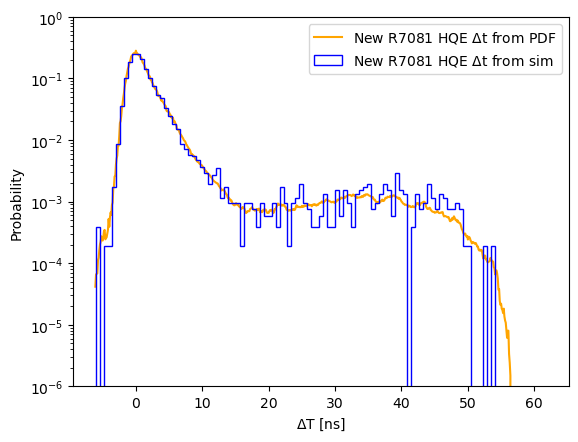

In [4]:
time_r7081=[-6.1, -6.0, -5.9, -5.8, -5.7, -5.6, -5.5, -5.4, -5.3, -5.2, -5.1, -5.0, -4.9, -4.8, -4.7, -4.6, -4.5, -4.4, -4.3, -4.2, -4.1, -4.0, -3.9, -3.8, -3.7, -3.6, -3.5, -3.4, -3.3, -3.2, -3.1, -3.0, -2.9, -2.8, -2.7, -2.6, -2.5, -2.4, -2.3, -2.2, -2.1, -2.0, -1.9, -1.8, -1.7, -1.6, -1.5, -1.4, -1.3, -1.2, -1.1, -1.0, -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1, 0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0, 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3.0, 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4.0, 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5.0, 5.1, 5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6.0, 6.1, 6.2, 6.3, 6.4, 6.5, 6.6, 6.7, 6.8, 6.9, 7.0, 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8, 7.9, 8.0, 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9.0, 9.1, 9.2, 9.3, 9.4, 9.5, 9.6, 9.7, 9.8, 9.9, 10.0, 10.1, 10.2, 10.3, 10.4, 10.5, 10.6, 10.7, 10.8, 10.9, 11.0, 11.1, 11.2, 11.3, 11.4, 11.5, 11.6, 11.7, 11.8, 11.9, 12.0, 12.1, 12.2, 12.3, 12.4, 12.5, 12.6, 12.7, 12.8, 12.9, 13.0, 13.1, 13.2, 13.3, 13.4, 13.5, 13.6, 13.7, 13.8, 13.9, 14.0, 14.1, 14.2, 14.3, 14.4, 14.5, 14.6, 14.7, 14.8, 14.9, 15.0, 15.1, 15.2, 15.3, 15.4, 15.5, 15.6, 15.7, 15.8, 15.9, 16.0, 16.1, 16.2, 16.3, 16.4, 16.5, 16.6, 16.7, 16.8, 16.9, 17.0, 17.1, 17.2, 17.3, 17.4, 17.5, 17.6, 17.7, 17.8, 17.9, 18.0, 18.1, 18.2, 18.3, 18.4, 18.5, 18.6, 18.7, 18.8, 18.9, 19.0, 19.1, 19.2, 19.3, 19.4, 19.5, 19.6, 19.7, 19.8, 19.9, 20.0, 20.1, 20.2, 20.3, 20.4, 20.5, 20.6, 20.7, 20.8, 20.9, 21.0, 21.1, 21.2, 21.3, 21.4, 21.5, 21.6, 21.7, 21.8, 21.9, 22.0, 22.1, 22.2, 22.3, 22.4, 22.5, 22.6, 22.7, 22.8, 22.9, 23.0, 23.1, 23.2, 23.3, 23.4, 23.5, 23.6, 23.7, 23.8, 23.9, 24.0, 24.1, 24.2, 24.3, 24.4, 24.5, 24.6, 24.7, 24.8, 24.9, 25.0, 25.1, 25.2, 25.3, 25.4, 25.5, 25.6, 25.7, 25.8, 25.9, 26.0, 26.1, 26.2, 26.3, 26.4, 26.5, 26.6, 26.7, 26.8, 26.9, 27.0, 27.1, 27.2, 27.3, 27.4, 27.5, 27.6, 27.7, 27.8, 27.9, 28.0, 28.1, 28.2, 28.3, 28.4, 28.5, 28.6, 28.7, 28.8, 28.9, 29.0, 29.1, 29.2, 29.3, 29.4, 29.5, 29.6, 29.7, 29.8, 29.9, 30.0, 30.1, 30.2, 30.3, 30.4, 30.5, 30.6, 30.7, 30.8, 30.9, 31.0, 31.1, 31.2, 31.3, 31.4, 31.5, 31.6, 31.7, 31.8, 31.9, 32.0, 32.1, 32.2, 32.3, 32.4, 32.5, 32.6, 32.7, 32.8, 32.9, 33.0, 33.1, 33.2, 33.3, 33.4, 33.5, 33.6, 33.7, 33.8, 33.9, 34.0, 34.1, 34.2, 34.3, 34.4, 34.5, 34.6, 34.7, 34.8, 34.9, 35.0, 35.1, 35.2, 35.3, 35.4, 35.5, 35.6, 35.7, 35.8, 35.9, 36.0, 36.1, 36.2, 36.3, 36.4, 36.5, 36.6, 36.7, 36.8, 36.9, 37.0, 37.1, 37.2, 37.3, 37.4, 37.5, 37.6, 37.7, 37.8, 37.9, 38.0, 38.1, 38.2, 38.3, 38.4, 38.5, 38.6, 38.7, 38.8, 38.9, 39.0, 39.1, 39.2, 39.3, 39.4, 39.5, 39.6, 39.7, 39.8, 39.9, 40.0, 40.1, 40.2, 40.3, 40.4, 40.5, 40.6, 40.7, 40.8, 40.9, 41.0, 41.1, 41.2, 41.3, 41.4, 41.5, 41.6, 41.7, 41.8, 41.9, 42.0, 42.1, 42.2, 42.3, 42.4, 42.5, 42.6, 42.7, 42.8, 42.9, 43.0, 43.1, 43.2, 43.3, 43.4, 43.5, 43.6, 43.7, 43.8, 43.9, 44.0, 44.1, 44.2, 44.3, 44.4, 44.5, 44.6, 44.7, 44.8, 44.9, 45.0, 45.1, 45.2, 45.3, 45.4, 45.5, 45.6, 45.7, 45.8, 45.9, 46.0, 46.1, 46.2, 46.3, 46.4, 46.5, 46.6, 46.7, 46.8, 46.9, 47.0, 47.1, 47.2, 47.3, 47.4, 47.5, 47.6, 47.7, 47.8, 47.9, 48.0, 48.1, 48.2, 48.3, 48.4, 48.5, 48.6, 48.7, 48.8, 48.9, 49.0, 49.1, 49.2, 49.3, 49.4, 49.5, 49.6, 49.7, 49.8, 49.9, 50.0, 50.1, 50.2, 50.3, 50.4, 50.5, 50.6, 50.7, 50.8, 50.9, 51.0, 51.1, 51.2, 51.3, 51.4, 51.5, 51.6, 51.7, 51.8, 51.9, 52.0, 52.1, 52.2, 52.3, 52.4, 52.5, 52.6, 52.7, 52.8, 52.9, 53.0, 53.1, 53.2, 53.3, 53.4, 53.5, 53.6, 53.7, 53.8, 53.9, 54.0, 54.1, 54.2, 54.3, 54.4, 54.5, 54.6, 54.7, 54.8, 54.9, 55.0, 55.1, 55.2, 55.3, 55.4, 55.5, 55.6, 55.7, 55.8, 55.9, 56.0, 56.1, 56.2, 56.3, 56.4, 56.5, 56.6, 56.7, 56.8, 56.9, 57.0, 57.1, 57.2, 57.3, 57.4, 57.5, 57.6, 57.7, 57.8, 57.9, 58.0, 58.1, 58.2, 58.3, 58.4, 58.5, 58.6, 58.7, 58.8, 58.9, 59.0, 59.1, 59.2, 59.3, 59.4, 59.5, 59.6, 59.7, 59.8, 59.9, 60.0, 60.1, 60.2, 60.3, 60.4, 60.5, 60.6, 60.7, 60.8, 60.9, 61.0, 61.1, 61.2, 61.3, 61.4, 61.5, 61.6, 61.7, 61.8, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
prob_r7081=[4.160592485091961e-05, 6.505255477382853e-05, 6.783381632859812e-05, 6.848560997008043e-05, 0.00011309235204811678, 0.0001228655835227482, 0.00016377641354482783, 0.00020274363894480044, 0.0002215503758908448, 0.0002741459666241277, 0.00024645900566596746, 0.00023332873900712813, 0.00026519646472991236, 0.0003349651725007439, 0.00034753499462807563, 0.00024438891887215545, 0.0002550292076547346, 0.0002634767506351429, 0.0003063796346803281, 0.00034988849786697103, 0.0005243140031543608, 0.0003914991045272226, 0.0005566890409616574, 0.0006678942824346521, 0.0006061470935059152, 0.0008841096278527314, 0.0009685109273198841, 0.0016255483640385299, 0.001768841234500213, 0.002565705434892328, 0.002618523794434973, 0.003986794461722525, 0.004966607717902975, 0.005569903410841465, 0.008010366443624593, 0.008040464560163125, 0.011848101988541793, 0.01892617634793079, 0.020312042655003908, 0.024556208535586564, 0.03278211249826036, 0.038421850628693584, 0.04842402889415509, 0.056877584464118947, 0.07064396081263699, 0.0826600892305096, 0.09172852131784025, 0.10968740603450826, 0.12693738978217026, 0.14361764471832159, 0.15322897373710428, 0.17153805036821587, 0.18727367953568283, 0.20214202194918726, 0.2287617258079236, 0.22863030646169868, 0.24082012794973673, 0.24934792890920315, 0.2575886848784516, 0.25399344080871245, 0.2534503358359562, 0.2823391624629519, 0.26113148589623075, 0.2566931316867089, 0.2448573987093223, 0.24311835191997644, 0.2364925159908962, 0.2292126514135516, 0.21860286754701871, 0.21948605383803185, 0.20503304317062604, 0.1840372686562842, 0.17733995115726048, 0.17082792630086616, 0.16190811956452159, 0.14721087841995026, 0.14465961655967136, 0.13819817823756106, 0.1306559283781458, 0.1226661340831903, 0.11465616135847904, 0.11021515737363004, 0.10850885767646708, 0.09570319182196027, 0.0987377460268758, 0.08749801979734126, 0.08493693997999409, 0.07905641929309548, 0.07470695147117633, 0.07149740162571902, 0.0677476293828914, 0.06709594448049926, 0.06478266507978298, 0.061701635088120425, 0.05584539252378311, 0.05152689503189979, 0.05266540027366835, 0.05180118574550488, 0.048668282137964466, 0.04391817956984753, 0.04508193427967867, 0.04251535281097365, 0.041226646455862354, 0.03969297888717757, 0.037770655405773124, 0.03638335089431283, 0.03539942910658411, 0.03022281469201081, 0.02928939195377344, 0.029313883189013245, 0.02868070847034915, 0.028406364175187913, 0.0259983522705135, 0.025789406187086368, 0.023427205442221027, 0.024120463745301017, 0.02220995342213917, 0.022787650490435022, 0.019427466464286346, 0.020423501384323882, 0.019368289542650352, 0.0182072706813969, 0.01706096910807248, 0.01504041448491602, 0.014753729023760737, 0.014725644167102063, 0.014217928614701019, 0.013108177695912911, 0.012474057270415367, 0.012129087540156363, 0.011672089400439957, 0.011111787724903252, 0.0107214966700584, 0.010076524146121974, 0.009762375047605267, 0.009568848043222871, 0.009055997159028491, 0.008456929973742557, 0.008229088538877551, 0.0077924545731395305, 0.007548644624261584, 0.00711502937799178, 0.007060953279094778, 0.006651184096999536, 0.006083803083228614, 0.005817240063696719, 0.005864525217084129, 0.0056151410014878686, 0.0055870384444680985, 0.005384510748649898, 0.005127321617204653, 0.004882404224619055, 0.0046925180504994645, 0.004541793262258966, 0.004426166482678884, 0.004387658948739493, 0.004240647111046245, 0.004126159304938842, 0.00403989271678861, 0.003969118907899401, 0.0039346564572483225, 0.0038082555960604666, 0.003645263621375114, 0.0034858647980851015, 0.0033877504956014676, 0.003251881622386205, 0.0031748656203812366, 0.003106681281518315, 0.0029902864149167004, 0.002903562311171377, 0.002783232386115949, 0.0027721855604402696, 0.002693068927998176, 0.002638740933196776, 0.0025241264702281765, 0.0024499470066931795, 0.002331104297913601, 0.002233616161188148, 0.0021965550499830062, 0.002137890100466843, 0.002098860767927439, 0.0020675817800001155, 0.002017680843860819, 0.001984146439175809, 0.0019823006944531493, 0.0019115462982355537, 0.0017970357787198271, 0.0017544510486659874, 0.0016733830607108737, 0.0016344063021138573, 0.0015179423015973168, 0.0015478699181640425, 0.0015597960037188761, 0.0015758135935399432, 0.001508212290874666, 0.0014746319386714903, 0.0013905050734962926, 0.0013258432418686518, 0.0013023356375161067, 0.001188943626989879, 0.0011322358462705242, 0.0011640327968476525, 0.0010937330540011319, 0.0010876190374391013, 0.001039022451041574, 0.001041677355255936, 0.0009700697868546574, 0.0009163229274544153, 0.0008883993315402387, 0.0008723377431631386, 0.0008731873497146177, 0.0009272719104701246, 0.000942512939218375, 0.0008926609730958269, 0.0008948287179385518, 0.0009151929067797267, 0.0008410807402175875, 0.0008276980494679885, 0.0008059541979425363, 0.0007975162424739578, 0.000760419213470975, 0.0007903338788588938, 0.0008180370839299463, 0.0007930669857288876, 0.0007934176364839158, 0.0007451921877169022, 0.000669497613326375, 0.0006521643052254759, 0.000671061921511131, 0.0007025893315475913, 0.0006941810824214417, 0.000702229737590504, 0.0007003692998689614, 0.000758398731830388, 0.0007699448861947811, 0.0007857865422240226, 0.0008120659361329993, 0.0007783865233252877, 0.0007427984195509189, 0.0007407140664842734, 0.0007157481173119032, 0.0007236374217883998, 0.0007218562246867453, 0.0007612362713553804, 0.0007486900793213619, 0.0007301003475351726, 0.0007665507249394872, 0.000766353930191316, 0.000674127264561825, 0.0006876268749976943, 0.000704585041166748, 0.0006731442734824605, 0.0006993391527847, 0.0007424858238362062, 0.0007274922728298709, 0.0007231514277316508, 0.0007473702326937982, 0.0007306762077234299, 0.000674380728192144, 0.0006539962924018793, 0.000658405255764177, 0.0006571500368323576, 0.000700497507287373, 0.0007279913164528688, 0.0007168548030767806, 0.0007393498026576602, 0.0007256826799984018, 0.0006829392273318965, 0.0006516655738829799, 0.0006768108205720284, 0.0007618836247733352, 0.0007495572553944496, 0.0007813233828577492, 0.0008402419168821814, 0.0008682013845457701, 0.0009323085585382176, 0.0008974591086746947, 0.0008830839347002844, 0.0008912391828469724, 0.0009121911010989077, 0.0008810640437662098, 0.0008582923968872413, 0.0008691939628812659, 0.0008917476401620354, 0.0008824081962571496, 0.0008357523611575164, 0.0008312807210851693, 0.0008034924758731891, 0.0007401879453625962, 0.0007359930711116128, 0.0007110169724285499, 0.0007126787135593301, 0.0007279918362267976, 0.0007301441387329193, 0.0007148174952496968, 0.0007227027659495252, 0.0007452539733575881, 0.0007511187656431407, 0.0007312121485154986, 0.000759067184346909, 0.0007298949639809605, 0.0007556053907279965, 0.0008239519688732421, 0.0008731319651491843, 0.0008358275970337413, 0.0008150798919963728, 0.0008300812267407891, 0.0008220126315122664, 0.0008121568488135444, 0.000816896494161674, 0.0008174900626190316, 0.0008544040850062206, 0.0008170872208023038, 0.0008335794378893201, 0.0008297120376348868, 0.0008668773985590393, 0.0008494808438044845, 0.0008604209354592627, 0.0008407967763371366, 0.0008655941141254033, 0.0009073439874561741, 0.0009053019098489748, 0.0008744373235232729, 0.000871544681113076, 0.000880067930311473, 0.0008815400393626284, 0.0008400770047125263, 0.0008701622173933082, 0.0009013642776710047, 0.0009058552802194233, 0.0008882651103900524, 0.0009036571150058915, 0.0008706834631793412, 0.0008638832595982542, 0.0008997348470587775, 0.0008791036895285492, 0.0009085424649804736, 0.0009359873664353941, 0.0009571091841262719, 0.0009531875987849845, 0.0009693662682361137, 0.0010078701723191354, 0.0009938693955636045, 0.0009508936570784852, 0.0009723134206951673, 0.001010332982270793, 0.0010272330546043785, 0.0010671036712715108, 0.0010913142402607548, 0.0010647454014353066, 0.0010467772859363673, 0.001045659952481195, 0.0010200762867401362, 0.0010145026356596996, 0.0010016607343307203, 0.000980982371840137, 0.0009748857044271545, 0.0009874538420247504, 0.0009959657426470935, 0.0009922447803102558, 0.0009555839734542499, 0.0009965975122784513, 0.0009987992933290339, 0.0009970500466761738, 0.0010449896310126634, 0.0010847137524565651, 0.001058903234460498, 0.0010822018478610588, 0.0010884646927744371, 0.0011018819449057117, 0.001164930280100016, 0.0011562311360434662, 0.0011391465884991764, 0.001127525812099681, 0.0011340721820680378, 0.0011996128486092305, 0.001154408357236382, 0.0011954696660135317, 0.0012287737384960896, 0.0012394123589468038, 0.0012494719962288618, 0.0012803085023809046, 0.0012873321146588865, 0.0012794215016128014, 0.0012825508180940388, 0.0012559921967140698, 0.0012295138264732475, 0.0012631215119785154, 0.0013028001562421852, 0.0012972853969966947, 0.0012414544954465162, 0.0012535871292353017, 0.0011963878783995089, 0.0012071486232018945, 0.001145274070915502, 0.0011614645599403598, 0.0011673261754581122, 0.001165781117046219, 0.0011743672207381105, 0.0011817940440412259, 0.001174524747898443, 0.0012290329458210303, 0.001234144166032073, 0.0011931991475501939, 0.001258264130239924, 0.0012879221118633015, 0.0012495473495584726, 0.0013110132039186205, 0.001307753075412529, 0.0013159675697852263, 0.0013126378923555757, 0.0012811913743742977, 0.001259927226707025, 0.0012467725695921362, 0.0012314463482482679, 0.0012331643649670034, 0.0011932194172183332, 0.0011499186923043538, 0.0011824168725277637, 0.0010905296434099096, 0.001076791825099851, 0.0010760837040932354, 0.0010096353062058745, 0.0009864717267040828, 0.0009874976499639513, 0.0009356528793351905, 0.0009758543466613002, 0.0009999431487030487, 0.0009751426207887679, 0.0009776752210498094, 0.0010255552792046052, 0.0010492074123990293, 0.0010799558051280411, 0.0010240031763685405, 0.0010259784087468704, 0.0010421991306069462, 0.0011061862050918982, 0.001160644417174953, 0.0011373526117267705, 0.0011509340438226822, 0.0012039359437825282, 0.0011928619920617664, 0.0011861230763752471, 0.0011885137474051993, 0.0012412767778934228, 0.001207033958951585, 0.0012283894743486173, 0.0012091375813052326, 0.0012514845863902662, 0.001268835213096885, 0.0012578433784266087, 0.0012396997532883828, 0.0012020340950851074, 0.0012014078989920768, 0.001169951507113981, 0.0011562535647081722, 0.0011643889303176236, 0.0011072157052009713, 0.0011514233550930777, 0.0010974109465957268, 0.0010627995428276246, 0.0010030046207978496, 0.0009843191594967042, 0.0009431819866515778, 0.0009224384151709101, 0.0009157357661759654, 0.0008851625520076323, 0.000890248493374991, 0.0008864760897464891, 0.0008848830181801083, 0.0008687233475155623, 0.0008220607298866736, 0.0008636640243181217, 0.0008433612270906881, 0.0008457672068760918, 0.0008156149574024458, 0.0008181810292395454, 0.0008277456437324335, 0.0008486911508799605, 0.0008281560021344219, 0.0008131046907887293, 0.0008095312003267134, 0.0008324946734237447, 0.0009285368560383116, 0.0009418307137396766, 0.000929359062367616, 0.0009474258261625674, 0.0009119181666861458, 0.0008738610785554935, 0.0008807854951150024, 0.0009366991613974548, 0.0009564036743154418, 0.0009589205544477145, 0.000952186126925173, 0.0009928665558914982, 0.0009978579802669997, 0.0009830093013671222, 0.000946133528633309, 0.0008292782630089132, 0.0007912252768319124, 0.000761667213928321, 0.0007610578068118621, 0.0007729897240031161, 0.0007960908148239193, 0.00078819373870047, 0.0007318222682899074, 0.0007187587748368728, 0.0006953351777201608, 0.0006855953100506971, 0.0006801408182284938, 0.0006823621162340473, 0.0006601764513594632, 0.0006661264284941514, 0.000668444011487652, 0.0006824114607561194, 0.0007115326517952891, 0.0006788681417377708, 0.0006578368133121963, 0.0006522656939552765, 0.0006539307961494586, 0.0006626322681985181, 0.0006704911747438246, 0.0006634491040943874, 0.0006763745001198159, 0.0006109708709721881, 0.0005747996561249286, 0.0005843208160932671, 0.0005831935842861988, 0.0005770063111269946, 0.0005671399509350362, 0.0005659681139401619, 0.0005517685562915229, 0.0005601344456367285, 0.0005225271385316313, 0.00048213892413069765, 0.00048253034288442707, 0.0004989298558206076, 0.0005381388752132969, 0.0005099120031455839, 0.0005445259509550364, 0.000577283295326941, 0.0005485510100369093, 0.0005126061629519477, 0.0004959082171799166, 0.0005082623855307742, 0.00047018987336140206, 0.0004910047523053458, 0.0004557309153934831, 0.00045295430164520983, 0.0004472172522132758, 0.00042522255719259735, 0.00038781887151968824, 0.0003547763784886284, 0.00034244494291122156, 0.0003120559988344211, 0.0002989523616290727, 0.0002935202087736657, 0.00030321885744629627, 0.00028268759170297134, 0.000269540320197579, 0.00027795223475204906, 0.00024246445519907945, 0.0002683845987434328, 0.0002668056483401449, 0.00025612213126162344, 0.00023545997955277368, 0.00022465778011508656, 0.0002098828923704251, 0.0002185012595682032, 0.00022035174668605685, 0.00021536910406448208, 0.00020998578862905945, 0.00020560712642120506, 0.00021208285783715645, 0.00020064745125859828, 0.00018611512252193857, 0.00018767761451766844, 0.00016757288601603306, 0.0001611743837550855, 0.00016615056134795003, 0.00015982063038883979, 0.00016504844213355578, 0.0001628084717766251, 0.00013828085001908684, 0.00011933831291377679, 0.00012210945901679774, 0.00013363569787261018, 0.0001327179770339113, 0.00011559090160186375, 0.0001165243743645696, 0.00010594736019546996, 0.00010343564351302722, 0.000105286837114432, 0.00010684932911016185, 0.00010902072816525536, 0.00012210945901679776, 0.00011587960320753857, 0.00010964974739827942, 0.00010778280187286771, 0.000105915856347456, 8.629281615697271e-05, 8.287913055983805e-05, 6.605650865747228e-05, 7.415330999214314e-05, 7.664927475057889e-05, 6.8568225339915e-05, 5.675328487842771e-05, 3.7145996611951315e-05, 3.806371745065021e-05, 2.4381831463751205e-05, 2.110077536278805e-05, 2.2034248125493895e-05, 1.8300357074670505e-05, 1.736688431196465e-05, 1.5499938786552956e-05, 1.8300357074670505e-05, 1.3632993261141258e-05, 1.1766047735729566e-05, 1.0832574973023715e-05, 8.032156684906166e-06, 6.165211159494478e-06, 8.032156684906173e-06, 8.032156684906166e-06, 3.364792871376924e-06, 2.431320108671079e-06, 1.497847345965232e-06, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

for i in range(len(prob_r7081)):
    prob_r7081[i]=prob_r7081[i]
    
sum=0
for i in prob_r7081:
    sum+=i*0.1 #multiply by bin width
print('Sum of probability is',sum)
    
plt.plot(time_r7081,prob_r7081,label='New R7081 HQE $\Delta$t from PDF',color='orange')
plt.hist(r7081_deltat,bins=100,density=True,histtype='step',color='blue',label='New R7081 HQE $\Delta$t from sim');
plt.ylabel('Probability')
plt.xlabel('$\Delta$T [ns]')
plt.yscale('log')
plt.legend()
plt.ylim(1e-6,1)

Sum of probability is 337.90477948418817


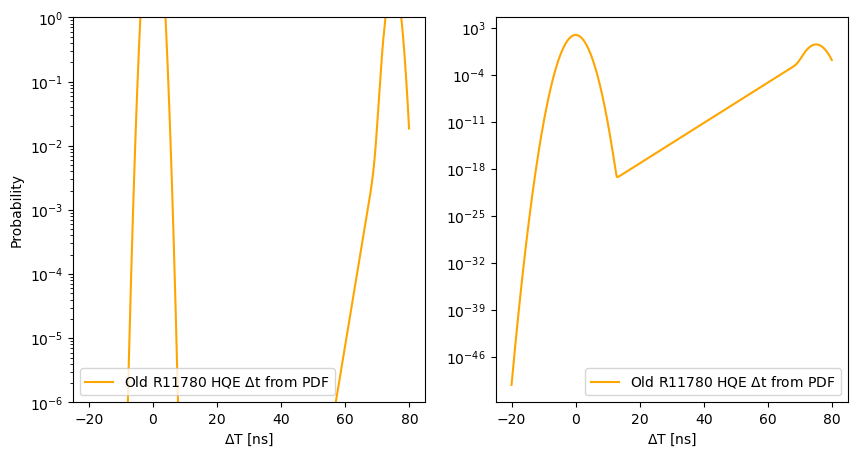

In [5]:
time_r11780_old=[-20.0 , -19.9 , -19.8 , -19.7 , -19.6 , -19.5 , -19.4 , -19.3 , -19.2 , -19.1 , -19.0 , -18.9 , -18.8 , -18.7 , -18.6 , -18.5 , -18.4 , -18.3 , -18.2 , -18.1 , -18.0 , -17.9 , -17.8 , -17.7 , -17.6 , -17.5 , -17.4 , -17.3 , -17.2 , -17.1 , -17.0 , -16.9 , -16.8 , -16.7 , -16.6 , -16.5 , -16.4 , -16.3 , -16.2 , -16.1 , -16.0 , -15.9 , -15.8 , -15.7 , -15.6 , -15.5 , -15.4 , -15.3 , -15.2 , -15.1 , -15.0 , -14.9 , -14.8 , -14.7 , -14.6 , -14.5 , -14.4 , -14.3 , -14.2 , -14.1 , -14.0 , -13.9 , -13.8 , -13.7 , -13.6 , -13.5 , -13.4 , -13.3 , -13.2 , -13.1 , -13.0 , -12.9 , -12.8 , -12.7 , -12.6 , -12.5 , -12.4 , -12.3 , -12.2 , -12.1 , -12.0 , -11.9 , -11.8 , -11.7 , -11.6 , -11.5 , -11.4 , -11.3 , -11.2 , -11.1 , -11.0 , -10.9 , -10.8 , -10.7 , -10.6 , -10.5 , -10.4 , -10.3 , -10.2 , -10.1 , -10.0 , -9.9 , -9.8 , -9.7 , -9.6 , -9.5 , -9.4 , -9.3 , -9.2 , -9.1 , -9.0 , -8.9 , -8.8 , -8.7 , -8.6 , -8.5 , -8.4 , -8.3 , -8.2 , -8.1 , -8.0 , -7.9 , -7.8 , -7.7 , -7.6 , -7.5 , -7.4 , -7.3 , -7.2 , -7.1 , -7.0 , -6.9 , -6.8 , -6.7 , -6.6 , -6.5 , -6.4 , -6.3 , -6.2 , -6.1 , -6.0 , -5.9 , -5.8 , -5.7 , -5.6 , -5.5 , -5.4 , -5.3 , -5.2 , -5.1 , -5.0 , -4.9 , -4.8 , -4.7 , -4.6 , -4.5 , -4.4 , -4.3 , -4.2 , -4.1 , -4.0 , -3.9 , -3.8 , -3.7 , -3.6 , -3.5 , -3.4 , -3.3 , -3.2 , -3.1 , -3.0 , -2.9 , -2.8 , -2.7 , -2.6 , -2.5 , -2.4 , -2.3 , -2.2 , -2.1 , -2.0 , -1.9 , -1.8 , -1.7 , -1.6 , -1.5 , -1.4 , -1.3 , -1.2 , -1.1 , -1.0 , -0.9 , -0.8 , -0.7 , -0.6 , -0.5 , -0.4 , -0.3 , -0.2 , -0.1 , 0.0 , 0.1 , 0.2 , 0.3 , 0.4 , 0.5 , 0.6 , 0.7 , 0.8 , 0.9 , 1.0 , 1.1 , 1.2 , 1.3 , 1.4 , 1.5 , 1.6 , 1.7 , 1.8 , 1.9 , 2.0 , 2.1 , 2.2 , 2.3 , 2.4 , 2.5 , 2.6 , 2.7 , 2.8 , 2.9 , 3.0 , 3.1 , 3.2 , 3.3 , 3.4 , 3.5 , 3.6 , 3.7 , 3.8 , 3.9 , 4.0 , 4.1 , 4.2 , 4.3 , 4.4 , 4.5 , 4.6 , 4.7 , 4.8 , 4.9 , 5.0 , 5.1 , 5.2 , 5.3 , 5.4 , 5.5 , 5.6 , 5.7 , 5.8 , 5.9 , 6.0 , 6.1 , 6.2 , 6.3 , 6.4 , 6.5 , 6.6 , 6.7 , 6.8 , 6.9 , 7.0 , 7.1 , 7.2 , 7.3 , 7.4 , 7.5 , 7.6 , 7.7 , 7.8 , 7.9 , 8.0 , 8.1 , 8.2 , 8.3 , 8.4 , 8.5 , 8.6 , 8.7 , 8.8 , 8.9 , 9.0 , 9.1 , 9.2 , 9.3 , 9.4 , 9.5 , 9.6 , 9.7 , 9.8 , 9.9 , 10.0 , 10.1 , 10.2 , 10.3 , 10.4 , 10.5 , 10.6 , 10.7 , 10.8 , 10.9 , 11.0 , 11.1 , 11.2 , 11.3 , 11.4 , 11.5 , 11.6 , 11.7 , 11.8 , 11.9 , 12.0 , 12.1 , 12.2 , 12.3 , 12.4 , 12.5 , 12.6 , 12.7 , 12.8 , 12.9 , 13.0 , 13.1 , 13.2 , 13.3 , 13.4 , 13.5 , 13.6 , 13.7 , 13.8 , 13.9 , 14.0 , 14.1 , 14.2 , 14.3 , 14.4 , 14.5 , 14.6 , 14.7 , 14.8 , 14.9 , 15.0 , 15.1 , 15.2 , 15.3 , 15.4 , 15.5 , 15.6 , 15.7 , 15.8 , 15.9 , 16.0 , 16.1 , 16.2 , 16.3 , 16.4 , 16.5 , 16.6 , 16.7 , 16.8 , 16.9 , 17.0 , 17.1 , 17.2 , 17.3 , 17.4 , 17.5 , 17.6 , 17.7 , 17.8 , 17.9 , 18.0 , 18.1 , 18.2 , 18.3 , 18.4 , 18.5 , 18.6 , 18.7 , 18.8 , 18.9 , 19.0 , 19.1 , 19.2 , 19.3 , 19.4 , 19.5 , 19.6 , 19.7 , 19.8 , 19.9 , 20.0 , 20.1 , 20.2 , 20.3 , 20.4 , 20.5 , 20.6 , 20.7 , 20.8 , 20.9 , 21.0 , 21.1 , 21.2 , 21.3 , 21.4 , 21.5 , 21.6 , 21.7 , 21.8 , 21.9 , 22.0 , 22.1 , 22.2 , 22.3 , 22.4 , 22.5 , 22.6 , 22.7 , 22.8 , 22.9 , 23.0 , 23.1 , 23.2 , 23.3 , 23.4 , 23.5 , 23.6 , 23.7 , 23.8 , 23.9 , 24.0 , 24.1 , 24.2 , 24.3 , 24.4 , 24.5 , 24.6 , 24.7 , 24.8 , 24.9 , 25.0 , 25.1 , 25.2 , 25.3 , 25.4 , 25.5 , 25.6 , 25.7 , 25.8 , 25.9 , 26.0 , 26.1 , 26.2 , 26.3 , 26.4 , 26.5 , 26.6 , 26.7 , 26.8 , 26.9 , 27.0 , 27.1 , 27.2 , 27.3 , 27.4 , 27.5 , 27.6 , 27.7 , 27.8 , 27.9 , 28.0 , 28.1 , 28.2 , 28.3 , 28.4 , 28.5 , 28.6 , 28.7 , 28.8 , 28.9 , 29.0 , 29.1 , 29.2 , 29.3 , 29.4 , 29.5 , 29.6 , 29.7 , 29.8 , 29.9 , 30.0 , 30.1 , 30.2 , 30.3 , 30.4 , 30.5 , 30.6 , 30.7 , 30.8 , 30.9 , 31.0 , 31.1 , 31.2 , 31.3 , 31.4 , 31.5 , 31.6 , 31.7 , 31.8 , 31.9 , 32.0 , 32.1 , 32.2 , 32.3 , 32.4 , 32.5 , 32.6 , 32.7 , 32.8 , 32.9 , 33.0 , 33.1 , 33.2 , 33.3 , 33.4 , 33.5 , 33.6 , 33.7 , 33.8 , 33.9 , 34.0 , 34.1 , 34.2 , 34.3 , 34.4 , 34.5 , 34.6 , 34.7 , 34.8 , 34.9 , 35.0 , 35.1 , 35.2 , 35.3 , 35.4 , 35.5 , 35.6 , 35.7 , 35.8 , 35.9 , 36.0 , 36.1 , 36.2 , 36.3 , 36.4 , 36.5 , 36.6 , 36.7 , 36.8 , 36.9 , 37.0 , 37.1 , 37.2 , 37.3 , 37.4 , 37.5 , 37.6 , 37.7 , 37.8 , 37.9 , 38.0 , 38.1 , 38.2 , 38.3 , 38.4 , 38.5 , 38.6 , 38.7 , 38.8 , 38.9 , 39.0 , 39.1 , 39.2 , 39.3 , 39.4 , 39.5 , 39.6 , 39.7 , 39.8 , 39.9 , 40.0 , 40.1 , 40.2 , 40.3 , 40.4 , 40.5 , 40.6 , 40.7 , 40.8 , 40.9 , 41.0 , 41.1 , 41.2 , 41.3 , 41.4 , 41.5 , 41.6 , 41.7 , 41.8 , 41.9 , 42.0 , 42.1 , 42.2 , 42.3 , 42.4 , 42.5 , 42.6 , 42.7 , 42.8 , 42.9 , 43.0 , 43.1 , 43.2 , 43.3 , 43.4 , 43.5 , 43.6 , 43.7 , 43.8 , 43.9 , 44.0 , 44.1 , 44.2 , 44.3 , 44.4 , 44.5 , 44.6 , 44.7 , 44.8 , 44.9 , 45.0 , 45.1 , 45.2 , 45.3 , 45.4 , 45.5 , 45.6 , 45.7 , 45.8 , 45.9 , 46.0 , 46.1 , 46.2 , 46.3 , 46.4 , 46.5 , 46.6 , 46.7 , 46.8 , 46.9 , 47.0 , 47.1 , 47.2 , 47.3 , 47.4 , 47.5 , 47.6 , 47.7 , 47.8 , 47.9 , 48.0 , 48.1 , 48.2 , 48.3 , 48.4 , 48.5 , 48.6 , 48.7 , 48.8 , 48.9 , 49.0 , 49.1 , 49.2 , 49.3 , 49.4 , 49.5 , 49.6 , 49.7 , 49.8 , 49.9 , 50.0 , 50.1 , 50.2 , 50.3 , 50.4 , 50.5 , 50.6 , 50.7 , 50.8 , 50.9 , 51.0 , 51.1 , 51.2 , 51.3 , 51.4 , 51.5 , 51.6 , 51.7 , 51.8 , 51.9 , 52.0 , 52.1 , 52.2 , 52.3 , 52.4 , 52.5 , 52.6 , 52.7 , 52.8 , 52.9 , 53.0 , 53.1 , 53.2 , 53.3 , 53.4 , 53.5 , 53.6 , 53.7 , 53.8 , 53.9 , 54.0 , 54.1 , 54.2 , 54.3 , 54.4 , 54.5 , 54.6 , 54.7 , 54.8 , 54.9 , 55.0 , 55.1 , 55.2 , 55.3 , 55.4 , 55.5 , 55.6 , 55.7 , 55.8 , 55.9 , 56.0 , 56.1 , 56.2 , 56.3 , 56.4 , 56.5 , 56.6 , 56.7 , 56.8 , 56.9 , 57.0 , 57.1 , 57.2 , 57.3 , 57.4 , 57.5 , 57.6 , 57.7 , 57.8 , 57.9 , 58.0 , 58.1 , 58.2 , 58.3 , 58.4 , 58.5 , 58.6 , 58.7 , 58.8 , 58.9 , 59.0 , 59.1 , 59.2 , 59.3 , 59.4 , 59.5 , 59.6 , 59.7 , 59.8 , 59.9 , 60.0 , 60.1 , 60.2 , 60.3 , 60.4 , 60.5 , 60.6 , 60.7 , 60.8 , 60.9 , 61.0 , 61.1 , 61.2 , 61.3 , 61.4 , 61.5 , 61.6 , 61.7 , 61.8 , 61.9 , 62.0 , 62.1 , 62.2 , 62.3 , 62.4 , 62.5 , 62.6 , 62.7 , 62.8 , 62.9 , 63.0 , 63.1 , 63.2 , 63.3 , 63.4 , 63.5 , 63.6 , 63.7 , 63.8 , 63.9 , 64.0 , 64.1 , 64.2 , 64.3 , 64.4 , 64.5 , 64.6 , 64.7 , 64.8 , 64.9 , 65.0 , 65.1 , 65.2 , 65.3 , 65.4 , 65.5 , 65.6 , 65.7 , 65.8 , 65.9 , 66.0 , 66.1 , 66.2 , 66.3 , 66.4 , 66.5 , 66.6 , 66.7 , 66.8 , 66.9 , 67.0 , 67.1 , 67.2 , 67.3 , 67.4 , 67.5 , 67.6 , 67.7 , 67.8 , 67.9 , 68.0 , 68.1 , 68.2 , 68.3 , 68.4 , 68.5 , 68.6 , 68.7 , 68.8 , 68.9 , 69.0 , 69.1 , 69.2 , 69.3 , 69.4 , 69.5 , 69.6 , 69.7 , 69.8 , 69.9 , 70.0 , 70.1 , 70.2 , 70.3 , 70.4 , 70.5 , 70.6 , 70.7 , 70.8 , 70.9 , 71.0 , 71.1 , 71.2 , 71.3 , 71.4 , 71.5 , 71.6 , 71.7 , 71.8 , 71.9 , 72.0 , 72.1 , 72.2 , 72.3 , 72.4 , 72.5 , 72.6 , 72.7 , 72.8 , 72.9 , 73.0 , 73.1 , 73.2 , 73.3 , 73.4 , 73.5 , 73.6 , 73.7 , 73.8 , 73.9 , 74.0 , 74.1 , 74.2 , 74.3 , 74.4 , 74.5 , 74.6 , 74.7 , 74.8 , 74.9 , 75.0 , 75.1 , 75.2 , 75.3 , 75.4 , 75.5 , 75.6 , 75.7 , 75.8 , 75.9 , 76.0 , 76.1 , 76.2 , 76.3 , 76.4 , 76.5 , 76.6 , 76.7 , 76.8 , 76.9 , 77.0 , 77.1 , 77.2 , 77.3 , 77.4 , 77.5 , 77.6 , 77.7 , 77.8 , 77.9 , 78.0 , 78.1 , 78.2 , 78.3 , 78.4 , 78.5 , 78.6 , 78.7 , 78.8 , 78.9 , 79.0 , 79.1 , 79.2 , 79.3 , 79.4 , 79.5 , 79.6 , 79.7 , 79.8 , 79.9]
prob_r11780_old=[6.372073314671898e-51, 2.1131633185864248e-50, 6.965873393507018e-50, 2.282486955682661e-49, 7.434148734263409e-49, 2.4068243756973017e-48, 7.74546990506898e-48, 2.4776579742568847e-47, 7.87816644529279e-47, 2.4899989489405877e-46, 7.822820938125674e-46, 2.4429682868476552e-45, 7.583374136676322e-45, 2.3399002881174974e-44, 7.176661009672538e-44, 2.187951690736043e-43, 6.63045357607164e-43, 1.997280043505786e-42, 5.980326574612045e-42, 1.779922334898079e-41, 5.26583708618515e-41, 1.5485456015254664e-40, 4.526586179963315e-40, 1.3152484582168032e-39, 3.79870023495927e-39, 1.0905672709668396e-38, 3.1121470564342117e-38, 8.827911579962235e-38, 2.489121253328609e-37, 6.976287106069101e-37, 1.943537174854576e-36, 5.382097642459413e-36, 1.4814960813073116e-35, 4.053588467111433e-35, 1.1024756809124556e-34, 2.9804963546109635e-34, 8.009370534026972e-34, 2.1394315226246646e-33, 5.6805267493077246e-33, 1.499232686088938e-32, 3.9331425680993246e-32, 1.025653224826475e-31, 2.658591578999612e-31, 6.850036944439124e-31, 1.754383026016413e-30, 4.466281928181497e-30, 1.1302071878163281e-29, 2.8428910097446936e-29, 7.108084291771683e-29, 1.7665874567025546e-28, 4.364233008660167e-28, 1.071694325137876e-27, 2.615918121229821e-27, 6.3469865168280925e-27, 1.5307392533553498e-26, 3.6696536504626375e-26, 8.744583881875128e-26, 2.0713020431611135e-25, 4.876833550885645e-25, 1.1413599960220382e-24, 2.655202047844847e-24, 6.1399200492066535e-24, 1.411295873618683e-23, 3.2245093566650777e-23, 7.323175215582903e-23, 1.653200100806987e-22, 3.7097243010235213e-22, 8.27462004376018e-22, 1.8346139894096425e-21, 4.04325893334334e-21, 8.85744823276669e-21, 1.9287498479654254e-20, 4.174778141764092e-20, 8.982166703877571e-20, 1.9209631561615657e-19, 4.083637407372974e-19, 8.629100471943601e-19, 1.812483626501496e-18, 3.7841894646148506e-18, 7.85347501906276e-18, 1.6200972134503185e-17, 3.322083142778617e-17, 6.771270040389411e-17, 1.3718921923028227e-16, 2.7628674442252137e-16, 5.530830225928202e-16, 1.1005526407715145e-15, 2.1768150273913907e-15, 4.279789881129003e-15, 8.3639914911029e-15, 1.6247813713846335e-14, 3.137375450406486e-14, 6.021826947198833e-14, 1.1488947944049047e-13, 2.1788255862146892e-13, 4.1072854393635184e-13, 7.696220795095616e-13, 1.4334758002057746e-12, 2.653954217456397e-12, 4.8841242293023736e-12, 8.934498720972823e-12, 1.624590443449844e-11, 2.936349939911432e-11, 5.2754795359467e-11, 9.42120140171483e-11, 1.6724026512938806e-10, 2.950975614902548e-10, 5.175837206563721e-10, 9.023724128130457e-10, 1.5638000589476573e-09, 2.6938093420765366e-09, 4.612567113817542e-09, 7.850706760638125e-09, 1.328204745448921e-08, 2.233631436205039e-08, 3.733775597476173e-08, 6.20404767896443e-08, 1.0246894258358211e-07, 1.6822850923678968e-07, 2.745346412815021e-07, 4.453330450046839e-07, 7.180635902840416e-07, 1.1508828123043141e-06, 1.83353631596558e-06, 2.9036090565044906e-06, 4.570639646285381e-06, 7.151646452087812e-06, 1.1123086249136019e-05, 1.7196291050064603e-05, 2.6426185747314083e-05, 4.0366806568536575e-05, 6.129210232270694e-05, 9.250705523083865e-05, 0.00013878272440077065, 0.00020695988538664906, 0.0003067800795294448, 0.0004520207278174844, 0.0006620331841247318, 0.0009638098966121301, 0.0013947398772530249, 0.002006251011731002, 0.002868583747346571, 0.004076993436162157, 0.005759737687649633, 0.00808826947098127, 0.011290124544559845, 0.01566506018207965, 0.021605066960236095, 0.029618930975411982, 0.04036206306817602, 0.05467232558167952, 0.07361256534713626, 0.09852049200379624, 0.1310664103702259, 0.1733191108640936, 0.22781992978755752, 0.29766460005292444, 0.386592013947504, 0.49907840871749026, 0.6404347653282818, 0.8169043911638455, 1.0357567590277081, 1.3053727293724322, 1.635315334358842, 2.03637940790482, 2.5206125740307463, 3.101299535329284, 3.792901319994621, 4.610941237660045, 5.571829845990198, 6.692622315789785, 7.99070325829055, 9.483396373789702, 11.187499191126951, 13.118746646567928, 15.291211206162009, 17.716651526416552, 20.403826085073682, 23.35779256453978, 26.57921776841303, 30.06372620863359, 33.8013179247082, 37.775887310376156, 41.96487448727774, 46.339078899059935, 50.862661201901666, 55.49335419435788, 60.18289656504033, 64.8776948590741, 69.51970960253261, 74.04755140670294, 78.39776260915194, 82.50625015608315, 86.30982656831905, 89.74780851950828, 92.76361728907354, 95.30632253709925, 97.33207075844022, 98.80534253028468, 99.69998822488654, 100.0, 99.69998822488313, 98.80534253027793, 97.33207075843025, 95.30632253708623, 92.76361728905769, 89.74780851948988, 86.30982656829842, 82.5062501560606, 78.39776260912782, 74.04755140667764, 69.51970960250648, 64.87769485904751, 60.1828965650136, 55.493354194331346, 50.8626612018756, 46.33907889903462, 41.96487448725337, 37.77588731035293, 33.80131792468626, 30.063726208613055, 26.57921776839396, 23.35779256452222, 20.403826085057652, 17.71665152640203, 15.29121120614895, 13.118746646556275, 11.187499191116629, 9.483396373780636, 7.990703258282633, 6.692622315782924, 5.571829845984299, 4.610941237655006, 3.792901319990344, 3.101299535325681, 2.5206125740277328, 2.036379407902316, 1.6353153343567752, 1.305372729370738, 1.0357567590263281, 0.8169043911627296, 0.6404347653273853, 0.49907840871677445, 0.38659201394693604, 0.29766460005247714, 0.22781992978720725, 0.17331911086382112, 0.13106641037001557, 0.09852049200363473, 0.07361256534701308, 0.05467232558158614, 0.040362063068105684, 0.02961893097535936, 0.021605066960196984, 0.01566506018205074, 0.011290124544538625, 0.008088269470965796, 0.005759737687638409, 0.004076993436154082, 0.0028685837473407926, 0.0020062510117268896, 0.0013947398772501188, 0.0009638098966100892, 0.0006620331841233065, 0.00045202072781649595, 0.0003067800795287636, 0.00020695988538618258, 0.00013878272440045287, 9.250705523062372e-05, 6.129210232256257e-05, 4.0366806568440054e-05, 2.6426185747250006e-05, 1.7196291050022326e-05, 1.1123086249108277e-05, 7.151646452069747e-06, 4.570639646273673e-06, 2.9036090564969503e-06, 1.8335363159607598e-06, 1.1508828123012477e-06, 7.180635902821053e-07, 4.4533304500346575e-07, 2.745346412807423e-07, 1.682285092363187e-07, 1.0246894258329161e-07, 6.204047678946643e-08, 3.733775597465335e-08, 2.2336314361984844e-08, 1.3282047454449716e-08, 7.850706760614529e-09, 4.612567113803515e-09, 2.6938093420717261e-09, 1.5638000589465127e-09, 9.0237241281419504e-10, 5.1758372065899754e-10, 2.9509756149388274e-10, 1.6724026513374968e-10, 9.4212014022095483e-11, 5.2754795364925514e-11, 2.9363499405053744e-11, 1.6245904440914595e-11, 8.9344987278778131e-12, 4.8841242367188014e-12, 2.6539542254139462e-12, 1.4334758087393204e-12, 7.696220886582641e-13, 4.1072855374314523e-13, 2.1788256913292138e-13, 1.1488949070681125e-13, 6.0218281547159611e-14, 3.1373767446034199e-14, 1.6247827584769747e-14, 8.3640063576242317e-15, 4.2798058146896712e-15, 2.1768321045680457e-15, 1.1005709436409771e-15, 5.5310263912502662e-16, 2.7630776890240098e-16, 1.372117527105061e-16, 6.7736851190331503e-17, 3.3246715599947045e-17, 1.6228714103403212e-17, 7.8832081251670319e-18, 3.816056618715209e-18, 1.8466379966021201e-18, 8.9951579470235504e-19, 4.4759680949484329e-19, 2.3414527756539785e-19, 1.3488862858366814e-19, 9.004935483883513e-20, 7.1055843071349159e-20, 6.4341386165631362e-20, 6.350947120682255e-20, 6.5568922221685847e-20, 6.9136202220843242e-20, 7.3582467453399948e-20, 7.8631457528660113e-20, 8.4171155652293191e-20, 9.0166168184130867e-20, 9.6617259801490325e-20, 1.0354282910360993e-19, 1.1097053106785683e-19, 1.189335659069918e-19, 1.2746910414792531e-19, 1.3661768756314762e-19, 1.464230774924389e-19, 1.5693231173369841e-19, 1.681958631076696e-19, 1.80267852528117e-19, 1.9320629630142844e-19, 2.0707337943881787e-19, 2.2193575216804344e-19, 2.3786484927065264e-19, 2.5493723300022377e-19, 2.7323496089431823e-19, 2.9284598010450511e-19, 3.1386455007879324e-19, 3.3639169560231184e-19, 3.605356923629495e-19, 3.8641258737129035e-19, 4.1414675673435376e-19, 4.4387150346328402e-19, 4.7572969818800759e-19, 5.0987446585829647e-19, 5.4646992173178608e-19, 5.856919601864126e-19, 6.2772910014866019e-19, 6.7278339120112157e-19, 7.2107138472453612e-19, 7.7282517474205637e-19, 8.282935134685106e-19, 8.8774300692649814e-19, 9.5145939637599438e-19, 1.019748931716592e-18, 1.0929398434635787e-18, 1.1713839203728352e-18, 1.2554582002973321e-18, 1.3455667824022564e-18, 1.4421427694490865e-18, 1.5456503494841283e-18, 1.6565870269370372e-18, 1.775486013853014e-18, 1.902918792752008e-18, 2.039497863433204e-18, 2.1858796869271794e-18, 2.3427678407456936e-18, 2.5109164005946893e-18, 2.691133564804539e-18, 2.8842855388982015e-18, 3.0913006989682871e-18, 3.3131740538741075e-18, 3.5509720277060627e-18, 3.805837585504053e-18, 4.078995726866448e-18, 4.3717593738544011e-18, 4.6855356814914341e-18, 5.0218328011894287e-18, 5.3822671296091312e-18, 5.76857107779646e-18, 6.1826013979366343e-18, 6.6263481077482804e-18, 7.1019440554121946e-18, 7.61167517100818e-18, 8.1579914537329762e-18, 8.7435187477088885e-18, 9.3710713629829576e-18, 1.0043665602378956e-17, 1.0764534259218369e-17, 1.1537142155593034e-17, 1.236520279587339e-17, 1.325269621549669e-17, 1.4203888110824531e-17, 1.5223350342016508e-17, 1.6315982907466116e-17, 1.7487037495417947e-17, 1.8742142725966103e-17, 2.0087331204758112e-17, 2.1529068518436953e-17, 2.3074284311186296e-17, 2.473040559174703e-17, 2.6505392430993646e-17, 2.8407776221649339e-17, 3.0446700684033324e-17, 3.2631965814932552e-17, 3.4974074990836244e-17, 3.748428545193257e-17, 4.0174662409516613e-17, 4.3058137036874326e-17, 4.6148568622373048e-17, 4.9460811183494547e-17, 5.3010784861987803e-17, 5.6815552443299258e-17, 6.089340136806724e-17, 6.5263931629865745e-17, 6.9948149981673179e-17, 7.4968570903865892e-17, 8.0349324819034026e-17, 8.6116274073749502e-17, 9.2297137244747008e-17, 9.8921622366990056e-17, 1.0602156972397667e-16, 1.136311048865996e-16, 1.2178680273613569e-16, 1.3052786325973277e-16, 1.3989629996334771e-16, 1.4993714180773324e-16, 1.6069864963806961e-16, 1.7223254814750065e-16, 1.8459427448949584e-16, 1.9784324473398206e-16, 2.120431394479554e-16, 2.2726220977320142e-16, 2.4357360547227374e-16, 2.6105572651946811e-16, 2.7979259992669824e-16, 2.9987428361546948e-16, 3.2139729927614242e-16, 3.4446509629500476e-16, 3.6918854897899523e-16, 3.9568648946796801e-16, 4.2408627889591499e-16, 4.5452441954640738e-16, 4.8714721094455231e-16, 5.2211145303894134e-16, 5.59585199853402e-16, 5.9974856723094478e-16, 6.4279459855229124e-16, 6.8893019259001633e-16, 7.3837709795799796e-16, 7.9137297893594382e-16, 8.4817255779183827e-16, 9.0904883909282383e-16, 9.7429442188911429e-16, 1.0442229060778929e-15, 1.1191703997068148e-15, 1.1994971344619014e-15, 1.2855891971045951e-15, 1.3778603851800461e-15, 1.4767541959160101e-15, 1.5827459578719032e-15, 1.6963451155836933e-15, 1.818097678185665e-15, 1.9485888437782479e-15, 2.0884458121558068e-15, 2.2383407994136522e-15, 2.3989942689238265e-15, 2.5711783942092155e-15, 2.7557207703601193e-15, 2.9535083918320494e-15, 3.165491915743838e-15, 3.3926902311674197e-15, 3.6361953563713663e-15, 3.8971776875565337e-15, 4.1768916243116546e-15, 4.4766815988273477e-15, 4.7979885378477003e-15, 5.1423567884184814e-15, 5.5114415407202931e-15, 5.9070167836641572e-15, 6.3309838314877383e-15, 6.7853804623349073e-15, 7.2723907127428052e-15, 7.7943553751131431e-15, 8.3537832486233912e-15, 8.9533631976547838e-15, 9.5959770756954936e-15, 1.0284713576837065e-14, 1.1022883081440697e-14, 1.1814033567328431e-14, 1.26619676629756e-14, 1.3570760924669947e-14, 1.4544781425485749e-14, 1.5588710750226441e-14, 1.670756649724695e-14, 1.7906726395309744e-14, 1.919195415139118e-14, 2.0569427153674329e-14, 2.2045766162881608e-14, 2.362806713465709e-14, 2.5323935325951449e-14, 2.7141521849340163e-14, 2.9089562850971789e-14, 3.1177421500453185e-14, 3.3415132994494228e-14, 3.5813452790619842e-14, 3.8383908302782744e-14, 4.1138854307349069e-14, 4.4091532325763651e-14, 4.7256134269314646e-14, 5.0647870651903396e-14, 5.4283043698680855e-14, 5.8179125701944158e-14, 6.2354843000907e-14, 6.6830265988989111e-14, 7.1626905581240378e-14, 7.6767816605566233e-14, 8.2277708614698933e-14, 8.8183064651528173e-14, 9.4512268538630226e-14, 1.0129574130380779e-13, 1.0856608739736278e-13, 1.1635825140388945e-13, 1.2470968600181521e-13, 1.3366053197797954e-13, 1.4325381116248217e-13, 1.5353563321113396e-13, 1.6455541722939951e-13, 1.7636612930305806e-13, 1.8902453707726232e-13, 2.0259148260761757e-13, 2.1713217479472774e-13, 2.3271650280778118e-13, 2.494193720036329e-13, 2.6732106395596165e-13, 2.8650762232496717e-13, 3.0707126642227099e-13, 3.291108344588022e-13, 3.5273225860611961e-13, 3.7804907415452838e-13, 4.0518296521523908e-13, 4.3426434958945972e-13, 4.65433005615567e-13, 4.9883874400727074e-13, 5.3464212791192854e-13, 5.7301524464994009e-13, 6.1414253284454804e-13, 6.5822166891761096e-13, 7.0546451721224609e-13, 7.5609814830906423e-13, 8.1036593043048624e-13, 8.6852869917892802e-13, 9.3086601123114328e-13, 9.9767748801455118e-13, 1.0692842558238676e-12, 1.1460304892998915e-12, 1.228285065689108e-12, 1.316443337835235e-12, 1.4109290344245061e-12, 1.5121962966181434e-12, 1.6207318608609884e-12, 1.737057398357873e-12, 1.8617320224623043e-12, 1.9953549760291222e-12, 2.1385685116477562e-12, 2.2920609785998056e-12, 2.4565701313782406e-12, 2.6328866756704955e-12, 2.8218580688490405e-12, 3.0243925932363167e-12, 3.2414637217220092e-12, 3.4741147967157807e-12, 3.7234640449246458e-12, 3.9907099520582831e-12, 4.2771370232955552e-12, 4.5841219571996556e-12, 4.9131402627565289e-12, 5.2657733513410435e-12, 5.6437161376981367e-12, 6.0487851864726931e-12, 6.4829274434440814e-12, 6.9482295934316293e-12, 7.446928089849366e-12, 7.9814199041166453e-12, 8.5542740465911943e-12, 9.1682439143994017e-12, 9.8262805255131532e-12, 1.053154670268219e-11, 1.1287432275396383e-11, 1.2097570372945506e-11, 1.296585488688829e-11, 1.3896459186863396e-11, 1.4893856179698877e-11, 1.5962839808233449e-11, 1.7108548093182557e-11, 1.8336487828798984e-11, 1.9652561051026503e-11, 2.1063093405364591e-11, 2.257486455079299e-11, 2.4195140745891244e-11, 2.5931709773776839e-11, 2.7792918373727063e-11, 2.9787712359398045e-11, 3.1925679616467215e-11, 3.4217096186365449e-11, 3.6672975657598324e-11, 3.9305122102053401e-11, 4.2126186810729602e-11, 4.5149729101586431e-11, 4.839028149178298e-11, 5.1863419547554189e-11, 5.5585836747454682e-11, 5.9575424718796698e-11, 6.385135923293505e-11, 6.8434192372731584e-11, 7.3345951315197372e-11, 7.8610244204107552e-11, 8.4252373621460006e-11, 9.0299458203173742e-11, 9.678056298356689e-11, 1.037268390951094e-10, 1.1117167349491045e-10, 1.1915084943759453e-10, 1.2770271846587072e-10, 1.3686838474546451e-10, 1.4669190263039692e-10, 1.5722048840821668e-10, 1.6850474724292086e-10, 1.8059891640634927e-10, 1.9356112596713665e-10, 2.0745367819022084e-10, 2.2234334698982196e-10, 2.383016988751914e-10, 2.5540543693174651e-10, 2.7373676949093171e-10, 2.9338380526079383e-10, 3.1444097681643641e-10, 3.3700949448584835e-10, 3.611978328127021e-10, 3.871222519342733e-10, 4.1490735638044571e-10, 4.4468669397965276e-10, 4.7660339775038765e-10, 5.1081087386349301e-10, 5.474735389818688e-10, 5.8676761052159924e-10, 6.2888195363287913e-10, 6.7401898897169669e-10, 7.2239566562541123e-10, 7.7424450386856169e-10, 8.298147127608997e-10, 8.8937338795930552e-10, 9.532067955007844e-10, 1.0216217477270061e-09, 1.0949470779637484e-09, 1.1735352210431985e-09, 1.2577639072657705e-09, 1.3480379779434201e-09, 1.4447913312508367e-09, 1.5484890077371234e-09, 1.6596294255218159e-09, 1.778746775918646e-09, 1.9064135910015878e-09, 2.0432434954540122e-09, 2.1898941559275182e-09, 2.3470704420864433e-09, 2.5155278145315662e-09, 2.6960759558868401e-09, 2.889582662501702e-09, 3.096978015474308e-09, 3.3192588510436641e-09, 3.557493551837292e-09, 3.8128271820032137e-09, 4.0864869909081054e-09, 4.3797883118550803e-09, 4.6941408841728866e-09, 5.0310556290631811e-09, 5.3921519117737861e-09, 5.7791653250034603e-09, 6.193956030948616e-09, 6.6385177020873936e-09, 7.1149871036747246e-09, 7.6256543640065002e-09, 8.1729739818162108e-09, 8.7595766237102466e-09, 9.3882817683459585e-09, 1.0062111258126461e-08, 1.0784303823547572e-08, 1.1558330650007036e-08, 1.2387912061897477e-08, 1.327703540417492e-08, 1.4229974207349449e-08, 1.5251308728013153e-08, 1.6345947963632739e-08, 1.7519153247420665e-08, 1.8776563536691917e-08, 2.0124222516253122e-08, 2.1568607647095575e-08, 2.3116661300014301e-08, 2.4775824123794954e-08, 2.6554070808350097e-08, 2.8459948414699458e-08, 3.0502617456026603e-08, 3.2691895927265478e-08, 3.5038306494841674e-08, 3.7553127073384575e-08, 4.024844503250664e-08, 4.3137215294191149e-08, 4.6233322600029045e-08, 4.9551648247590893e-08, 5.3108141616700717e-08, 5.6919896829398915e-08, 6.1005234912053815e-08, 6.5383791854532241e-08, 7.007661298968405e-08, 7.510625414676915e-08, 8.0496890065014087e-08, 8.6274430588383966e-08, 9.2466645200059017e-08, 9.9103296495181786e-08, 1.0621628323340248e-07, 1.1383979365880007e-07, 1.2201046982410882e-07, 1.3076758370906448e-07, 1.4015322597936948e-07, 1.5021250829354126e-07, 1.6099378013002974e-07, 1.7254886117676793e-07, 1.8493329040011986e-07, 1.9820659299036746e-07, 2.1243256646680708e-07, 2.2767958731760013e-07, 2.4402093964822002e-07, 2.615351674181342e-07, 2.8030645195874171e-07, 3.0042501658708253e-07, 3.219875602600627e-07, 3.4509772235354275e-07, 3.6986658080024343e-07, 3.9641318598073493e-07, 4.2486513293361834e-07, 4.5535917463520927e-07, 4.8804187929644492e-07, 5.2307033483626841e-07, 5.6061290391748892e-07, 6.0085003317417681e-07, 6.4397512052013155e-07, 6.9019544470708549e-07, 7.3973316160049405e-07, 7.9282637196148553e-07, 8.4973026586724504e-07, 9.1071834927041854e-07, 9.7608375859289936e-07, 1.0461406696725574e-06, 1.1212258078349889e-06, 1.2017000663483536e-06, 1.2879502410402758e-06, 1.3803908894141981e-06, 1.4794663232010025e-06, 1.5856527439229711e-06, 1.6994605317345068e-06, 1.8214366985408729e-06, 1.9521675171858178e-06, 2.0922813393451147e-06, 2.2424516156699997e-06, 2.4034001326967551e-06, 2.575900482080577e-06, 2.7607817788283962e-06, 2.9589326464020338e-06, 3.1713054878460044e-06, 3.3989210634690467e-06, 3.6428733970817457e-06, 3.9043350343716754e-06, 4.1845626786903116e-06, 4.4849032313400435e-06, 4.8068002653935102e-06, 5.1518009641612057e-06, 5.5215635576569008e-06, 5.9178652928041269e-06, 6.3426109756920087e-06, 6.7978421269381619e-06, 7.2857467941636354e-06, 7.808670068743427e-06, 8.3691253573806232e-06, 8.9698064626801785e-06, 9.6136005307872135e-06, 1.0303601928322525e-05, 1.1043127115313822e-05, 1.1835730585608408e-05, 1.2685221951384338e-05, 1.359568425387659e-05, 1.4571493588327522e-05, 1.5617340137487471e-05, 1.6738250714762446e-05, 1.7939612925362139e-05, 1.9227201061577385e-05, 2.0607203856650674e-05, 2.2086254230637984e-05, 2.3671461171235054e-05, 2.5370443902801262e-05, 2.7191368507812153e-05, 2.9142987176760916e-05, 3.1234680275163287e-05, 3.3476501429859151e-05, 3.5879225851316212e-05, 3.8454402124197854e-05, 4.1214407715130126e-05, 4.417250846446887e-05, 4.7342922348021569e-05, 5.074088781521128e-05, 5.4382737032180128e-05, 5.8285974381921619e-05, 6.2469360598828874e-05, 6.6953002942183099e-05, 7.1758451842215038e-05, 7.6908804483607527e-05, 8.2428815824855687e-05, 8.8345017587969149e-05, 9.4685845791815944e-05, 0.00010148177744425123, 0.00010876547705340964, 0.00011657195366761143, 0.00012493872920680464, 0.00013390601890709097, 0.00014351692476470481, 0.00015381764293825496, 0.00016485768615002839, 0.00017669012222143481, 0.00018937182998809233, 0.00020296377397202779, 0.00021753129934955602, 0.00023314444895423326, 0.00024987830430975918, 0.0002678133530185334, 0.00028703588526642244, 0.00030763842278266445, 0.00032972018436993748, 0.00035338759316716348, 0.00037875483222632185, 0.00040594445690834611, 0.00043508807521084523, 0.00046632711066858302, 0.00049981366722730725, 0.00053571152188808496, 0.00057419727947721397, 0.00061546173528845207, 0.00065971150642433096, 0.00070717101250795543, 0.00075808491238842904, 0.00081272113717913575, 0.00087137470347234717, 0.00093437254630902194, 0.0010020796823617965, 0.0010749071032369135, 0.0011533219107840535, 0.0012378603453392575, 0.0013291445289604702, 0.0014279039544537366, 0.0015350030031730814, 0.0016514760761895302, 0.0017785722802952735, 0.0019178120277197814, 0.00207105839059573, 0.0022406066005980691, 0.0024292957007135273, 0.0026406470361854894, 0.0028790350070911014, 0.0031498962816379574, 0.0034599844658024181, 0.0038176780114803693, 0.0042333498820968001, 0.0047198081307679614, 0.005292817018815189, 0.0059717085364610579, 0.006780094095394173, 0.0077466856457448392, 0.0089062344196623056, 0.010300593805646121, 0.011979910395755636, 0.014003943909573583, 0.016443512383578919, 0.019382053641958212, 0.022917287584879181, 0.02716295623449011, 0.032250609812321827, 0.038331397494215047, 0.045577811085975639, 0.054185318955110445, 0.064373816502855674, 0.076388808721613438, 0.090502230502459868, 0.10701280196511165, 0.12624580987603221, 0.14855220294198343, 0.17430688917437917, 0.20390612835048508, 0.23776392252153089, 0.2763073230915839, 0.31997059460503657, 0.36918820320739754, 0.42438663168964214, 0.48597506268721224, 0.522350703634044, 0.5955291389167735, 0.6759485651655683, 0.7638253842040637, 0.859299039127604, 0.9624193971631568, 1.0731346331486185, 1.1912800172729123, 1.316568030374593, 1.4485802362702476, 1.5867613314368505, 1.7304157665693096, 1.8787072913679845, 2.030661713404454, 2.1851730848958715, 2.3410134393580964, 2.496846095908443, 2.6512424357345195, 2.802701936900517, 2.949675134723868, 3.0905890602669985, 3.2238746040224897, 3.3479951604845484, 3.461475836491872, 3.5629324558876787, 3.6510995682339864, 3.724856672083207, 3.7832518945334788, 3.8255224281112477, 3.8511111118045704, 3.8596786524611213, 3.8511111118041086, 3.8255224281103293, 3.7832518945321167, 3.724856672081419, 3.6510995682317957, 3.562932455885113, 3.461475836488965, 3.347995160481334, 3.223874604019008, 3.09058906026329, 2.9496751347199743, 2.8027019368964807, 2.6512424357303837, 2.496846095904248, 2.3410134393538824, 2.185173084891676, 2.0306617134003115, 1.8787072913639264, 1.730415766565364, 1.586761331433042, 1.4485802362665972, 1.3165680303711174, 1.1912800172696243, 1.0731346331455278, 0.9624193971602696, 0.8592990391249228, 0.7638253842015889, 0.675948565163297, 0.5955291389147009, 0.5223507036321636, 0.4561326438166176, 0.3965426703361774, 0.3432088686496009, 0.29573101836450144, 0.253690998758353, 0.2166621457713881, 0.18421747446261302, 0.15593672553809704, 0.13141223420945092, 0.11025365357471477, 0.09209159253020996, 0.07658024982610301, 0.06339914144306752, 0.05225402838291559, 0.04287715678879646, 0.03502692271117899, 0.028487070550527283, 0.023065527994403548, 0.01859297186842219]

sum=0
for i in prob_r11780_old:
    sum+=i*0.1 #multiply by bin width
print('Sum of probability is',sum)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

ax1.plot(time_r11780_old,prob_r11780_old,label='Old R11780 HQE $\Delta$t from PDF',color='orange')
ax1.set_ylabel('Probability')
ax1.set_xlabel('$\Delta$T [ns]')
ax1.set_yscale('log')
ax1.legend()
ax1.set_ylim(1e-6,1)

ax2.plot(time_r11780_old,prob_r11780_old,label='Old R11780 HQE $\Delta$t from PDF',color='orange')
ax2.set_xlabel('$\Delta$T [ns]')
ax2.set_yscale('log')
ax2.legend()

Sum of probability is 0.5566709242971377


(1e-06, 1)

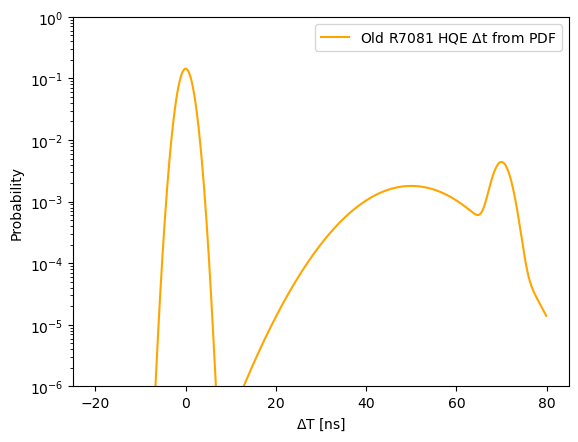

In [6]:
time_r7081_old=[-20.0 , -19.9 , -19.8 , -19.7 , -19.6 , -19.5 , -19.4 , -19.3 , -19.2 , -19.1 , -19.0 , -18.9 , -18.8 , -18.7 , -18.6 , -18.5 , -18.4 , -18.3 , -18.2 , -18.1 , -18.0 , -17.9 , -17.8 , -17.7 , -17.6 , -17.5 , -17.4 , -17.3 , -17.2 , -17.1 , -17.0 , -16.9 , -16.8 , -16.7 , -16.6 , -16.5 , -16.4 , -16.3 , -16.2 , -16.1 , -16.0 , -15.9 , -15.8 , -15.7 , -15.6 , -15.5 , -15.4 , -15.3 , -15.2 , -15.1 , -15.0 , -14.9 , -14.8 , -14.7 , -14.6 , -14.5 , -14.4 , -14.3 , -14.2 , -14.1 , -14.0 , -13.9 , -13.8 , -13.7 , -13.6 , -13.5 , -13.4 , -13.3 , -13.2 , -13.1 , -13.0 , -12.9 , -12.8 , -12.7 , -12.6 , -12.5 , -12.4 , -12.3 , -12.2 , -12.1 , -12.0 , -11.9 , -11.8 , -11.7 , -11.6 , -11.5 , -11.4 , -11.3 , -11.2 , -11.1 , -11.0 , -10.9 , -10.8 , -10.7 , -10.6 , -10.5 , -10.4 , -10.3 , -10.2 , -10.1 , -10.0 , -9.9 , -9.8 , -9.7 , -9.6 , -9.5 , -9.4 , -9.3 , -9.2 , -9.1 , -9.0 , -8.9 , -8.8 , -8.7 , -8.6 , -8.5 , -8.4 , -8.3 , -8.2 , -8.1 , -8.0 , -7.9 , -7.8 , -7.7 , -7.6 , -7.5 , -7.4 , -7.3 , -7.2 , -7.1 , -7.0 , -6.9 , -6.8 , -6.7 , -6.6 , -6.5 , -6.4 , -6.3 , -6.2 , -6.1 , -6.0 , -5.9 , -5.8 , -5.7 , -5.6 , -5.5 , -5.4 , -5.3 , -5.2 , -5.1 , -5.0 , -4.9 , -4.8 , -4.7 , -4.6 , -4.5 , -4.4 , -4.3 , -4.2 , -4.1 , -4.0 , -3.9 , -3.8 , -3.7 , -3.6 , -3.5 , -3.4 , -3.3 , -3.2 , -3.1 , -3.0 , -2.9 , -2.8 , -2.7 , -2.6 , -2.5 , -2.4 , -2.3 , -2.2 , -2.1 , -2.0 , -1.9 , -1.8 , -1.7 , -1.6 , -1.5 , -1.4 , -1.3 , -1.2 , -1.1 , -1.0 , -0.9 , -0.8 , -0.7 , -0.6 , -0.5 , -0.4 , -0.3 , -0.2 , -0.1 , 0.0 , 0.1 , 0.2 , 0.3 , 0.4 , 0.5 , 0.6 , 0.7 , 0.8 , 0.9 , 1.0 , 1.1 , 1.2 , 1.3 , 1.4 , 1.5 , 1.6 , 1.7 , 1.8 , 1.9 , 2.0 , 2.1 , 2.2 , 2.3 , 2.4 , 2.5 , 2.6 , 2.7 , 2.8 , 2.9 , 3.0 , 3.1 , 3.2 , 3.3 , 3.4 , 3.5 , 3.6 , 3.7 , 3.8 , 3.9 , 4.0 , 4.1 , 4.2 , 4.3 , 4.4 , 4.5 , 4.6 , 4.7 , 4.8 , 4.9 , 5.0 , 5.1 , 5.2 , 5.3 , 5.4 , 5.5 , 5.6 , 5.7 , 5.8 , 5.9 , 6.0 , 6.1 , 6.2 , 6.3 , 6.4 , 6.5 , 6.6 , 6.7 , 6.8 , 6.9 , 7.0 , 7.1 , 7.2 , 7.3 , 7.4 , 7.5 , 7.6 , 7.7 , 7.8 , 7.9 , 8.0 , 8.1 , 8.2 , 8.3 , 8.4 , 8.5 , 8.6 , 8.7 , 8.8 , 8.9 , 9.0 , 9.1 , 9.2 , 9.3 , 9.4 , 9.5 , 9.6 , 9.7 , 9.8 , 9.9 , 10.0 , 10.1 , 10.2 , 10.3 , 10.4 , 10.5 , 10.6 , 10.7 , 10.8 , 10.9 , 11.0 , 11.1 , 11.2 , 11.3 , 11.4 , 11.5 , 11.6 , 11.7 , 11.8 , 11.9 , 12.0 , 12.1 , 12.2 , 12.3 , 12.4 , 12.5 , 12.6 , 12.7 , 12.8 , 12.9 , 13.0 , 13.1 , 13.2 , 13.3 , 13.4 , 13.5 , 13.6 , 13.7 , 13.8 , 13.9 , 14.0 , 14.1 , 14.2 , 14.3 , 14.4 , 14.5 , 14.6 , 14.7 , 14.8 , 14.9 , 15.0 , 15.1 , 15.2 , 15.3 , 15.4 , 15.5 , 15.6 , 15.7 , 15.8 , 15.9 , 16.0 , 16.1 , 16.2 , 16.3 , 16.4 , 16.5 , 16.6 , 16.7 , 16.8 , 16.9 , 17.0 , 17.1 , 17.2 , 17.3 , 17.4 , 17.5 , 17.6 , 17.7 , 17.8 , 17.9 , 18.0 , 18.1 , 18.2 , 18.3 , 18.4 , 18.5 , 18.6 , 18.7 , 18.8 , 18.9 , 19.0 , 19.1 , 19.2 , 19.3 , 19.4 , 19.5 , 19.6 , 19.7 , 19.8 , 19.9 , 20.0 , 20.1 , 20.2 , 20.3 , 20.4 , 20.5 , 20.6 , 20.7 , 20.8 , 20.9 , 21.0 , 21.1 , 21.2 , 21.3 , 21.4 , 21.5 , 21.6 , 21.7 , 21.8 , 21.9 , 22.0 , 22.1 , 22.2 , 22.3 , 22.4 , 22.5 , 22.6 , 22.7 , 22.8 , 22.9 , 23.0 , 23.1 , 23.2 , 23.3 , 23.4 , 23.5 , 23.6 , 23.7 , 23.8 , 23.9 , 24.0 , 24.1 , 24.2 , 24.3 , 24.4 , 24.5 , 24.6 , 24.7 , 24.8 , 24.9 , 25.0 , 25.1 , 25.2 , 25.3 , 25.4 , 25.5 , 25.6 , 25.7 , 25.8 , 25.9 , 26.0 , 26.1 , 26.2 , 26.3 , 26.4 , 26.5 , 26.6 , 26.7 , 26.8 , 26.9 , 27.0 , 27.1 , 27.2 , 27.3 , 27.4 , 27.5 , 27.6 , 27.7 , 27.8 , 27.9 , 28.0 , 28.1 , 28.2 , 28.3 , 28.4 , 28.5 , 28.6 , 28.7 , 28.8 , 28.9 , 29.0 , 29.1 , 29.2 , 29.3 , 29.4 , 29.5 , 29.6 , 29.7 , 29.8 , 29.9 , 30.0 , 30.1 , 30.2 , 30.3 , 30.4 , 30.5 , 30.6 , 30.7 , 30.8 , 30.9 , 31.0 , 31.1 , 31.2 , 31.3 , 31.4 , 31.5 , 31.6 , 31.7 , 31.8 , 31.9 , 32.0 , 32.1 , 32.2 , 32.3 , 32.4 , 32.5 , 32.6 , 32.7 , 32.8 , 32.9 , 33.0 , 33.1 , 33.2 , 33.3 , 33.4 , 33.5 , 33.6 , 33.7 , 33.8 , 33.9 , 34.0 , 34.1 , 34.2 , 34.3 , 34.4 , 34.5 , 34.6 , 34.7 , 34.8 , 34.9 , 35.0 , 35.1 , 35.2 , 35.3 , 35.4 , 35.5 , 35.6 , 35.7 , 35.8 , 35.9 , 36.0 , 36.1 , 36.2 , 36.3 , 36.4 , 36.5 , 36.6 , 36.7 , 36.8 , 36.9 , 37.0 , 37.1 , 37.2 , 37.3 , 37.4 , 37.5 , 37.6 , 37.7 , 37.8 , 37.9 , 38.0 , 38.1 , 38.2 , 38.3 , 38.4 , 38.5 , 38.6 , 38.7 , 38.8 , 38.9 , 39.0 , 39.1 , 39.2 , 39.3 , 39.4 , 39.5 , 39.6 , 39.7 , 39.8 , 39.9 , 40.0 , 40.1 , 40.2 , 40.3 , 40.4 , 40.5 , 40.6 , 40.7 , 40.8 , 40.9 , 41.0 , 41.1 , 41.2 , 41.3 , 41.4 , 41.5 , 41.6 , 41.7 , 41.8 , 41.9 , 42.0 , 42.1 , 42.2 , 42.3 , 42.4 , 42.5 , 42.6 , 42.7 , 42.8 , 42.9 , 43.0 , 43.1 , 43.2 , 43.3 , 43.4 , 43.5 , 43.6 , 43.7 , 43.8 , 43.9 , 44.0 , 44.1 , 44.2 , 44.3 , 44.4 , 44.5 , 44.6 , 44.7 , 44.8 , 44.9 , 45.0 , 45.1 , 45.2 , 45.3 , 45.4 , 45.5 , 45.6 , 45.7 , 45.8 , 45.9 , 46.0 , 46.1 , 46.2 , 46.3 , 46.4 , 46.5 , 46.6 , 46.7 , 46.8 , 46.9 , 47.0 , 47.1 , 47.2 , 47.3 , 47.4 , 47.5 , 47.6 , 47.7 , 47.8 , 47.9 , 48.0 , 48.1 , 48.2 , 48.3 , 48.4 , 48.5 , 48.6 , 48.7 , 48.8 , 48.9 , 49.0 , 49.1 , 49.2 , 49.3 , 49.4 , 49.5 , 49.6 , 49.7 , 49.8 , 49.9 , 50.0 , 50.1 , 50.2 , 50.3 , 50.4 , 50.5 , 50.6 , 50.7 , 50.8 , 50.9 , 51.0 , 51.1 , 51.2 , 51.3 , 51.4 , 51.5 , 51.6 , 51.7 , 51.8 , 51.9 , 52.0 , 52.1 , 52.2 , 52.3 , 52.4 , 52.5 , 52.6 , 52.7 , 52.8 , 52.9 , 53.0 , 53.1 , 53.2 , 53.3 , 53.4 , 53.5 , 53.6 , 53.7 , 53.8 , 53.9 , 54.0 , 54.1 , 54.2 , 54.3 , 54.4 , 54.5 , 54.6 , 54.7 , 54.8 , 54.9 , 55.0 , 55.1 , 55.2 , 55.3 , 55.4 , 55.5 , 55.6 , 55.7 , 55.8 , 55.9 , 56.0 , 56.1 , 56.2 , 56.3 , 56.4 , 56.5 , 56.6 , 56.7 , 56.8 , 56.9 , 57.0 , 57.1 , 57.2 , 57.3 , 57.4 , 57.5 , 57.6 , 57.7 , 57.8 , 57.9 , 58.0 , 58.1 , 58.2 , 58.3 , 58.4 , 58.5 , 58.6 , 58.7 , 58.8 , 58.9 , 59.0 , 59.1 , 59.2 , 59.3 , 59.4 , 59.5 , 59.6 , 59.7 , 59.8 , 59.9 , 60.0 , 60.1 , 60.2 , 60.3 , 60.4 , 60.5 , 60.6 , 60.7 , 60.8 , 60.9 , 61.0 , 61.1 , 61.2 , 61.3 , 61.4 , 61.5 , 61.6 , 61.7 , 61.8 , 61.9 , 62.0 , 62.1 , 62.2 , 62.3 , 62.4 , 62.5 , 62.6 , 62.7 , 62.8 , 62.9 , 63.0 , 63.1 , 63.2 , 63.3 , 63.4 , 63.5 , 63.6 , 63.7 , 63.8 , 63.9 , 64.0 , 64.1 , 64.2 , 64.3 , 64.4 , 64.5 , 64.6 , 64.7 , 64.8 , 64.9 , 65.0 , 65.1 , 65.2 , 65.3 , 65.4 , 65.5 , 65.6 , 65.7 , 65.8 , 65.9 , 66.0 , 66.1 , 66.2 , 66.3 , 66.4 , 66.5 , 66.6 , 66.7 , 66.8 , 66.9 , 67.0 , 67.1 , 67.2 , 67.3 , 67.4 , 67.5 , 67.6 , 67.7 , 67.8 , 67.9 , 68.0 , 68.1 , 68.2 , 68.3 , 68.4 , 68.5 , 68.6 , 68.7 , 68.8 , 68.9 , 69.0 , 69.1 , 69.2 , 69.3 , 69.4 , 69.5 , 69.6 , 69.7 , 69.8 , 69.9 , 70.0 , 70.1 , 70.2 , 70.3 , 70.4 , 70.5 , 70.6 , 70.7 , 70.8 , 70.9 , 71.0 , 71.1 , 71.2 , 71.3 , 71.4 , 71.5 , 71.6 , 71.7 , 71.8 , 71.9 , 72.0 , 72.1 , 72.2 , 72.3 , 72.4 , 72.5 , 72.6 , 72.7 , 72.8 , 72.9 , 73.0 , 73.1 , 73.2 , 73.3 , 73.4 , 73.5 , 73.6 , 73.7 , 73.8 , 73.9 , 74.0 , 74.1 , 74.2 , 74.3 , 74.4 , 74.5 , 74.6 , 74.7 , 74.8 , 74.9 , 75.0 , 75.1 , 75.2 , 75.3 , 75.4 , 75.5 , 75.6 , 75.7 , 75.8 , 75.9 , 76.0 , 76.1 , 76.2 , 76.3 , 76.4 , 76.5 , 76.6 , 76.7 , 76.8 , 76.9 , 77.0 , 77.1 , 77.2 , 77.3 , 77.4 , 77.5 , 77.6 , 77.7 , 77.8 , 77.9 , 78.0 , 78.1 , 78.2 , 78.3 , 78.4 , 78.5 , 78.6 , 78.7 , 78.8 , 78.9 , 79.0 , 79.1 , 79.2 , 79.3 , 79.4 , 79.5 , 79.6 , 79.7 , 79.8 , 79.9]
prob_r7081_old=[ 4.93629671886e-15 , 5.32612775326e-15 , 5.74612024813e-15 , 6.19855772134e-15 , 6.68589263156e-15 , 7.21075857257e-15 , 7.77598332464e-15 , 8.38460282169e-15 , 9.0398760965e-15 , 9.74530127072e-15 , 1.05046326604e-14 , 1.13218990728e-14 , 1.2201423375e-14 , 1.31478434201e-14 , 1.41661344225e-14 , 1.52616328797e-14 , 1.64400621445e-14 , 1.77075597577e-14 , 1.90707066591e-14 , 2.05365584029e-14 , 2.21126785094e-14 , 2.38071740956e-14 , 2.56287339366e-14 , 2.7586669117e-14 , 2.96909564441e-14 , 3.19522848056e-14 , 3.43821046631e-14 , 3.69926808899e-14 , 3.979714917e-14 , 4.28095761919e-14 , 4.6045023884e-14 , 4.95196179556e-14 , 5.32506210214e-14 , 5.72565106085e-14 , 6.15570623591e-14 , 6.61734387668e-14 , 7.11282838003e-14 , 7.64458237945e-14 , 8.21519750098e-14 , 8.82744582863e-14 , 9.48429212461e-14 , 1.01889068525e-13 , 1.0944680054e-13 , 1.17552361343e-13 , 1.26244496125e-13 , 1.35564618987e-13 , 1.45556991619e-13 , 1.56268913588e-13 , 1.67750924934e-13 , 1.80057021878e-13 , 1.9324488644e-13 , 2.07376130833e-13 , 2.22516557571e-13 , 2.38736436239e-13 , 2.56110797984e-13 , 2.74719748796e-13 , 2.94648802761e-13 , 3.15989236494e-13 , 3.38838466063e-13 , 3.63300447783e-13 , 3.89486104326e-13 , 4.17513777702e-13 , 4.47509710739e-13 , 4.79608558793e-13 , 5.13953933516e-13 , 5.50698980627e-13 , 5.90006993718e-13 , 6.32052066295e-13 , 6.7701978432e-13 , 7.25107961718e-13 , 7.7652742143e-13 , 8.31502824781e-13 , 8.90273552119e-13 , 9.53094637985e-13 , 1.02023776435e-12 , 1.09199231605e-12 , 1.16866650327e-12 , 1.25058855732e-12 , 1.33810800815e-12 , 1.43159705604e-12 , 1.53145205668e-12 , 1.63809515137e-12 , 1.75197609543e-12 , 1.87357437608e-12 , 2.00340177823e-12 , 2.14200567318e-12 , 2.2899735086e-12 , 2.44793932912e-12 , 2.61659375956e-12 , 2.79669991188e-12 , 2.98911942315e-12 , 3.19485577657e-12 , 3.41512699331e-12 , 3.65148800378e-12 , 3.90603661558e-12 , 4.1817593792e-12 , 4.483110241e-12 , 4.81697429981e-12 , 5.19426489188e-12 , 5.63255602565e-12 , 6.16039722816e-12 , 6.82434576285e-12 , 7.70036122894e-12 , 8.91216072039e-12 , 1.06606122001e-11 , 1.32705249533e-11 , 1.72646899532e-11 , 2.3480338537e-11 , 3.32512199881e-11 , 4.86905531234e-11 , 7.31280737521e-11 , 1.11780992951e-10 , 1.7277776671e-10 , 2.68710618104e-10 , 4.18975401939e-10 , 6.53276290266e-10 , 1.01684252439e-09 , 1.57814510299e-09 , 2.4402397681e-09 , 3.75733518735e-09 , 5.75883978294e-09 , 8.78404019409e-09 , 1.33317906475e-08 , 2.01312505548e-08 , 3.02419307123e-08 , 4.51942635487e-08 , 6.71858064634e-08 , 9.93532710884e-08 , 1.46147147206e-07 , 2.13844113846e-07 , 3.1124311283e-07 , 4.50604365663e-07 , 6.48907252611e-07 , 9.29523383092e-07 , 1.32442591639e-06 , 1.87708575976e-06 , 2.64624011835e-06 , 3.71075929708e-06 , 5.17588373063e-06 , 7.18115469268e-06 , 9.9104183083e-06 , 1.36043420866e-05 , 1.85759441979e-05 , 2.52296952574e-05 , 3.40848065481e-05 , 4.58033623737e-05 , 6.12239813087e-05 , 8.1401694008e-05 , 0.00010765469523 , 0.00014161855513 , 0.000185308349252 , 0.000241188977309 , 0.000312253677574 , 0.00040211039729 , 0.000515075243216 , 0.000656271706546 , 0.000831733734043 , 0.00104851000914 , 0.00131476602695 , 0.00163987971776 , 0.00203452552574 , 0.00251074102398 , 0.003081969393 , 0.00376307046595 , 0.00457029261449 , 0.00552119758283 , 0.00663453054418 , 0.00793002821809 , 0.00942815890615 , 0.0111497898197 , 0.0131157791082 , 0.0153464925483 , 0.017861247885 , 0.020677693266 , 0.0238111299635 , 0.027273793507 , 0.0310741112728 , 0.0352159582939 , 0.0396979363453 , 0.0445127039928 , 0.0496463870452 , 0.055078099503 , 0.0607796044873 , 0.0667151426254 , 0.0728414519059 , 0.0791079981062 , 0.0854574286284 , 0.0918262551367 , 0.0981457620242 , 0.104343128791 , 0.110342745271 , 0.116067689748 , 0.121441331809 , 0.12638901473 , 0.130839766691 , 0.134727986567 , 0.137995048627 , 0.140590771428 , 0.142474699549 , 0.143617152422 , 0.144000002272 , 0.143617152669 , 0.142474700044 , 0.140590772172 , 0.137995049621 , 0.134727987815 , 0.130839768196 , 0.126389016495 , 0.12144133384 , 0.116067692049 , 0.110342747849 , 0.104343131652 , 0.0981457651761 , 0.0918262585875 , 0.0854574323871 , 0.0791080021825 , 0.0728414563104 , 0.0667151473694 , 0.0607796095831 , 0.0550781049636 , 0.0496463928845 , 0.0445127102258 , 0.0396979429878 , 0.0352159653628 , 0.0310741187859 , 0.0272738014833 , 0.0238111384231 , 0.0206777022301 , 0.0178612573758 , 0.0153465025896 , 0.0131157897249 , 0.011149801038 , 0.00942817075371 , 0.00793004072396 , 0.00663454373894 , 0.00552121149861 , 0.00457030728505 , 0.00376308592674 , 0.00308198568123 , 0.0025107581787 , 0.00203454358791 , 0.00163989873032 , 0.00131478603493 , 0.00104853105972 , 0.000831755876646 , 0.000656294992946 , 0.000515099727625 , 0.000402136136464 , 0.000312280730917 , 0.000241217406984 , 0.000185338220297 , 0.000141649935578 , 0.000107687656229 , 8.14363099558e-05 , 6.1260329986e-05 , 4.58415250829e-05 , 3.41248682597e-05 , 2.52717447607e-05 , 1.86200742587e-05 , 1.36506496096e-05 , 9.95900450699e-06 , 7.23212526535e-06 , 5.22934904288e-06 , 3.76683457152e-06 , 2.70504563143e-06 , 1.93874704594e-06 , 1.38907398009e-06 , 9.97294918396e-07 , 7.19944871266e-07 , 5.25056833419e-07 , 3.89265594505e-07 , 2.95598427362e-07 , 2.31802026882e-07 , 1.89084640487e-07 , 1.61177061093e-07 , 1.43636563729e-07 , 1.33334504919e-07 , 1.28081709577e-07 , 1.26356452878e-07 , 1.27108268408e-07 , 1.29617389749e-07 , 1.33394716469e-07 , 1.38111089094e-07 , 1.43547612669e-07 , 1.49560991625e-07 , 1.56059496671e-07 , 1.62986410737e-07 , 1.70308700526e-07 , 1.78009314794e-07 , 1.86081982993e-07 , 1.94527726424e-07 , 2.03352534668e-07 , 2.12565829819e-07 , 2.22179459945e-07 , 2.32207045835e-07 , 2.42663562164e-07 , 2.53565073245e-07 , 2.6492857017e-07 , 2.76771874105e-07 , 2.89113582519e-07 , 3.01973043226e-07 , 3.15370346368e-07 , 3.29326328002e-07 , 3.43862581236e-07 , 3.59001472298e-07 , 3.74766159928e-07 , 3.91180617068e-07 , 4.0826965419e-07 , 4.260589439e-07 , 4.44575046562e-07 , 4.63845436806e-07 , 4.83898530834e-07 , 5.04763714492e-07 , 5.26471372054e-07 , 5.49052915749e-07 , 5.72540815991e-07 , 5.96968632342e-07 , 6.22371045197e-07 , 6.48783888207e-07 , 6.76244181444e-07 , 7.04790165324e-07 , 7.34461335282e-07 , 7.65298477226e-07 , 7.97343703764e-07 , 8.30640491221e-07 , 8.65233717453e-07 , 9.0116970046e-07 , 9.38496237816e-07 , 9.77262646917e-07 , 1.01751980605e-06 , 1.05932019631e-06 , 1.10271794435e-06 , 1.14776886594e-06 , 1.19453051046e-06 , 1.24306220618e-06 , 1.29342510643e-06 , 1.34568223662e-06 , 1.39989854216e-06 , 1.45614093722e-06 , 1.51447835441e-06 , 1.57498179527e-06 , 1.63772438173e-06 , 1.70278140836e-06 , 1.77023039559e-06 , 1.84015114374e-06 , 1.91262578796e-06 , 1.9877388541e-06 , 2.06557731532e-06 , 2.14623064976e-06 , 2.22979089891e-06 , 2.31635272695e-06 , 2.40601348092e-06 , 2.49887325173e-06 , 2.59503493602e-06 , 2.69460429891e-06 , 2.79769003748e-06 , 2.90440384516e-06 , 3.01486047684e-06 , 3.12917781491e-06 , 3.24747693588e-06 , 3.369882178e-06 , 3.4965212094e-06 , 3.62752509714e-06 , 3.76302837689e-06 , 3.90316912333e-06 , 4.0480890212e-06 , 4.19793343705e-06 , 4.35285149155e-06 , 4.51299613251e-06 , 4.67852420834e-06 , 4.84959654221e-06 , 5.0263780066e-06 , 5.20903759845e-06 , 5.39774851469e-06 , 5.59268822823e-06 , 5.79403856438e-06 , 6.00198577756e-06 , 6.21672062833e-06 , 6.43843846079e-06 , 6.66733928008e-06 , 6.90362783019e-06 , 7.14751367188e-06 , 7.39921126065e-06 , 7.65894002483e-06 , 7.92692444369e-06 , 8.20339412543e-06 , 8.48858388509e-06 , 8.78273382237e-06 , 9.08608939918e-06 , 9.39890151688e-06 , 9.7214265933e-06 , 1.00539266393e-05 , 1.03966693347e-05 , 1.07499281041e-05 , 1.11139821919e-05 , 1.14891167362e-05 , 1.18756228429e-05 , 1.22737976582e-05 , 1.26839444403e-05 , 1.3106372631e-05 , 1.35413979247e-05 , 1.3989342338e-05 , 1.44505342767e-05 , 1.49253086023e-05 , 1.54140066968e-05 , 1.59169765263e-05 , 1.64345727028e-05 , 1.69671565442e-05 , 1.75150961332e-05 , 1.80787663737e-05 , 1.86585490454e-05 , 1.9254832857e-05 , 1.98680134962e-05 , 2.04984936782e-05 , 2.1146683192e-05 , 2.18129989434e-05 , 2.24978649965e-05 , 2.32017126118e-05 , 2.39249802817e-05 , 2.46681137636e-05 , 2.5431566109e-05 , 2.62157976908e-05 , 2.70212762261e-05 , 2.78484767967e-05 , 2.86978818656e-05 , 2.956998129e-05 , 3.04652723308e-05 , 3.13842596582e-05 , 3.23274553532e-05 , 3.32953789055e-05 , 3.42885572068e-05 , 3.53075245401e-05 , 3.63528225647e-05 , 3.7425000296e-05 , 3.85246140816e-05 , 3.96522275721e-05 , 4.08084116871e-05 , 4.1993744576e-05 , 4.32088115742e-05 , 4.44542051538e-05 , 4.57305248683e-05 , 4.70383772932e-05 , 4.83783759595e-05 , 4.97511412826e-05 , 5.11573004849e-05 , 5.25974875122e-05 , 5.40723429448e-05 , 5.55825139014e-05 , 5.7128653938e-05 , 5.87114229387e-05 , 6.03314870021e-05 , 6.19895183189e-05 , 6.36861950447e-05 , 6.54222011645e-05 , 6.71982263515e-05 , 6.90149658179e-05 , 7.08731201591e-05 , 7.2773395191e-05 , 7.47165017792e-05 , 7.67031556617e-05 , 7.87340772635e-05 , 8.08099915041e-05 , 8.29316275975e-05 , 8.50997188438e-05 , 8.73150024142e-05 , 8.95782191272e-05 , 9.18901132177e-05 , 9.42514320977e-05 , 9.66629261095e-05 , 9.91253482704e-05 , 0.00010163945401 , 0.0001042060009 , 0.000106825748372 , 0.000109499457434 , 0.000112227890374 , 0.000115011810455 , 0.000117851981606 , 0.000120749168099 , 0.000123704134225 , 0.000126717643956 , 0.000129790460602 , 0.000132923346459 , 0.000136117062446 , 0.000139372367744 , 0.000142690019414 , 0.000146070772016 , 0.000149515377218 , 0.000153024583394 , 0.000156599135221 , 0.000160239773265 , 0.000163947233554 , 0.000167722247155 , 0.000171565539736 , 0.000175477831119 , 0.000179459834835 , 0.000183512257664 , 0.000187635799172 , 0.000191831151241 , 0.00019609899759 , 0.000200440013295 , 0.000204854864298 , 0.000209344206914 , 0.00021390868733 , 0.000218548941095 , 0.000223265592618 , 0.000228059254643 , 0.000232930527732 , 0.00023787999974 , 0.000242908245286 , 0.000248015825215 , 0.000253203286067 , 0.000258471159531 , 0.000263819961902 , 0.000269250193536 , 0.000274762338301 , 0.000280356863019 , 0.000286034216921 , 0.000291794831084 , 0.000297639117879 , 0.000303567470411 , 0.000309580261961 , 0.000315677845428 , 0.000321860552769 , 0.000328128694442 , 0.00033448255885 , 0.00034092241178 , 0.000347448495856 , 0.000354061029978 , 0.00036076020878 , 0.000367546202077 , 0.000374419154324 , 0.000381379184072 , 0.000388426383439 , 0.000395560817569 , 0.000402782524111 , 0.000410091512697 , 0.000417487764424 , 0.000424971231346 , 0.000432541835971 , 0.000440199470766 , 0.000447943997667 , 0.000455775247603 , 0.000463693020018 , 0.000471697082417 , 0.000479787169905 , 0.00048796298475 , 0.000496224195946 , 0.000504570438795 , 0.000513001314493 , 0.000521516389733 , 0.000530115196317 , 0.000538797230784 , 0.000547561954048 , 0.000556408791052 , 0.000565337130432 , 0.000574346324201 , 0.000583435687444 , 0.000592604498031 , 0.000601851996342 , 0.000611177385012 , 0.000620579828691 , 0.000630058453824 , 0.000639612348439 , 0.000649240561967 , 0.000658942105069 , 0.000668715949487 , 0.000678561027911 , 0.000688476233869 , 0.000698460421636 , 0.000708512406157 , 0.000718630963001 , 0.000728814828327 , 0.000739062698875 , 0.000749373231978 , 0.000759745045598 , 0.000770176718377 , 0.000780666789718 , 0.000791213759883 , 0.00080181609012 , 0.000812472202805 , 0.000823180481615 , 0.000833939271717 , 0.000844746879988 , 0.000855601575253 , 0.00086650158855 , 0.000877445113418 , 0.000888430306209 , 0.000899455286426 , 0.000910518137083 , 0.000921616905089 , 0.000932749601662 , 0.00094391420276 , 0.000955108649542 , 0.000966330848851 , 0.00097757867372 , 0.00098884996391 , 0.00100014252646 , 0.00101145413628 , 0.00102278253673 , 0.0010341254403 , 0.00104548052919 , 0.00105684545608 , 0.00106821784472 , 0.00107959529078 , 0.00109097536248 , 0.00110235560144 , 0.00111373352345 , 0.00112510661926 , 0.00113647235546 , 0.00114782817532 , 0.00115917149967 , 0.00117049972778 , 0.00118181023835 , 0.00119310039038 , 0.00120436752417 , 0.0012156089623 , 0.00122682201062 , 0.0012380039593 , 0.00124915208383 , 0.00126026364608 , 0.00127133589542 , 0.00128236606973 , 0.0012933513966 , 0.00130428909437 , 0.00131517637329 , 0.0013260104367 , 0.00133678848215 , 0.00134750770258 , 0.00135816528756 , 0.00136875842442 , 0.00137928429948 , 0.00138974009932 , 0.00140012301192 , 0.00141043022798 , 0.00142065894211 , 0.00143080635413 , 0.00144086967028 , 0.00145084610451 , 0.00146073287976 , 0.0014705272292 , 0.00148022639755 , 0.00148982764233 , 0.00149932823512 , 0.0015087254629 , 0.00151801662929 , 0.00152719905583 , 0.00153627008326 , 0.00154522707281 , 0.00155406740747 , 0.00156278849323 , 0.00157138776039 , 0.00157986266477 , 0.00158821068897 , 0.00159642934365 , 0.0016045161687 , 0.00161246873452 , 0.0016202846432 , 0.00162796152972 , 0.00163549706318 , 0.00164288894792 , 0.00165013492471 , 0.00165723277193 , 0.00166418030663 , 0.00167097538574 , 0.00167761590707 , 0.00168409981048 , 0.00169042507889 , 0.00169658973936 , 0.00170259186407 , 0.00170842957137 , 0.00171410102674 , 0.00171960444375 , 0.00172493808501 , 0.00173010026306 , 0.00173508934129 , 0.00173990373479 , 0.00174454191117 , 0.0017490023914 , 0.00175328375059 , 0.00175738461874 , 0.00176130368147 , 0.00176503968075 , 0.00176859141553 , 0.0017719577424 , 0.00177513757623 , 0.0017781298907 , 0.0017809337189 , 0.00178354815384 , 0.00178597234891 , 0.00178820551838 , 0.0017902469378 , 0.00179209594438 , 0.00179375193737 , 0.00179521437838 , 0.00179648279169 , 0.00179755676445 , 0.00179843594697 , 0.00179912005288 , 0.00179960885927 , 0.00179990220685 , 0.0018 , 0.00179990220685 , 0.00179960885927 , 0.00179912005288 , 0.00179843594697 , 0.00179755676445 , 0.00179648279169 , 0.00179521437838 , 0.00179375193737 , 0.00179209594438 , 0.0017902469378 , 0.00178820551838 , 0.00178597234891 , 0.00178354815384 , 0.0017809337189 , 0.0017781298907 , 0.00177513757623 , 0.0017719577424 , 0.00176859141553 , 0.00176503968075 , 0.00176130368147 , 0.00175738461874 , 0.00175328375059 , 0.0017490023914 , 0.00174454191117 , 0.00173990373479 , 0.00173508934129 , 0.00173010026306 , 0.00172493808501 , 0.00171960444375 , 0.00171410102674 , 0.00170842957137 , 0.00170259186407 , 0.00169658973936 , 0.00169042507889 , 0.00168409981048 , 0.00167761590707 , 0.00167097538574 , 0.00166418030663 , 0.00165723277193 , 0.00165013492471 , 0.00164288894792 , 0.00163549706318 , 0.00162796152972 , 0.0016202846432 , 0.00161246873452 , 0.0016045161687 , 0.00159642934365 , 0.00158821068897 , 0.00157986266477 , 0.00157138776039 , 0.00156278849323 , 0.00155406740747 , 0.00154522707281 , 0.00153627008326 , 0.00152719905583 , 0.00151801662929 , 0.0015087254629 , 0.00149932823512 , 0.00148982764233 , 0.00148022639755 , 0.0014705272292 , 0.00146073287976 , 0.00145084610451 , 0.00144086967028 , 0.00143080635413 , 0.00142065894211 , 0.00141043022798 , 0.00140012301192 , 0.00138974009932 , 0.00137928429949 , 0.00136875842443 , 0.00135816528759 , 0.00134750770262 , 0.0013367884822 , 0.00132601043679 , 0.00131517637342 , 0.00130428909456 , 0.00129335139688 , 0.00128236607014 , 0.00127133589601 , 0.00126026364694 , 0.00124915208508 , 0.00123800396111 , 0.00122682201324 , 0.00121560896606 , 0.00120436752956 , 0.0011931003981 , 0.00118181024935 , 0.00117049974341 , 0.00115917152181 , 0.00114782820659 , 0.00113647239947 , 0.00112510668101 , 0.00111373360981 , 0.00110235572186 , 0.00109097552984 , 0.00107959552266 , 0.00106821816499 , 0.00105684589703 , 0.0010454811344 , 0.00103412626833 , 0.00102278366607 , 0.0010114556717 , 0.00100014460744 , 0.000988852775399 , 0.000977582460219 , 0.000966335932445 , 0.000955115453095 , 0.000943923279552 , 0.000932761673147 , 0.000921632908802 , 0.000910539287189 , 0.000899483149952 , 0.000888466898645 , 0.000877493018137 , 0.000866564105389 , 0.000855682904632 , 0.000844852350154 , 0.000834075618073 , 0.000823356188659 , 0.000812697920986 , 0.000802105141895 , 0.000791582751477 , 0.000781136347491 , 0.000770772371369 , 0.000760498278622 , 0.000750322736655 , 0.000740255853132 , 0.000730309438085 , 0.000720497302996 , 0.000710835599976 , 0.000701343203993 , 0.000692042140755 , 0.000682958062407 , 0.000674120772516 , 0.000665564800992 , 0.000657330028509 , 0.000649462358685 , 0.000642014434726 , 0.000635046395408 , 0.000628626663222 , 0.000622832755144 , 0.000617752103967 , 0.000613482875339 , 0.000610134762744 , 0.000607829739647 , 0.000606702744956 , 0.000606902274969 , 0.000608590852179 , 0.000611945338722 , 0.000617157060184 , 0.000624431703861 , 0.000633988954746 , 0.000646061832462 , 0.000660895693367 , 0.000678746864138 , 0.000699880876523 , 0.000724570277657 , 0.000753091996437 , 0.00078572425405 , 0.000822743015725 , 0.000864417991148 , 0.000911008202576 , 0.00096275715238 , 0.00101988763522 , 0.00108259625411 , 0.00115104771384 , 0.00122536897914 , 0.00130564339845 , 0.00139190490611 , 0.00148413242653 , 0.00158224461208 , 0.00168609505249 , 0.00179546809614 , 0.0019100754229 , 0.00202955350409 , 0.00215346207637 , 0.00228128374429 , 0.00241242480976 , 0.0025462174063 , 0.00268192299201 , 0.00281873722856 , 0.00295579624324 , 0.00309218424015 , 0.00322694239362 , 0.00335907892423 , 0.00348758022566 , 0.00361142287994 , 0.00372958637108 , 0.00384106628275 , 0.00394488774567 , 0.00404011888617 , 0.00412588401821 , 0.00420137631892 , 0.00426586973154 , 0.00431872985062 , 0.00435942356107 , 0.00438752722625 , 0.00440273324917 , 0.0044048548643 , 0.00439382905555 , 0.00436971753651 , 0.00433270577121 , 0.00428310005718 , 0.00422132273456 , 0.00414790562602 , 0.00406348184959 , 0.00396877618062 , 0.00386459416761 , 0.00375181023023 , 0.00363135498481 , 0.00350420205326 , 0.00337135461552 , 0.00323383196315 , 0.00309265630261 , 0.00294884004264 , 0.0028033737799 , 0.00265721517312 , 0.00251127886805 , 0.00236642760494 , 0.00222346460829 , 0.00208312732574 , 0.00194608255002 , 0.00181292292685 , 0.00168416482157 , 0.00156024749065 , 0.00144153347995 , 0.00132831015167 , 0.00122079222535 , 0.0011191252058 , 0.00102338956264 , 0.00093360552181 , 0.00084973832837 , 0.000771703843222 , 0.000699374341651 , 0.000632584390371 , 0.000571136690074 , 0.000514807782775 , 0.000463353536464 , 0.000416514333646 , 0.000374019904496 , 0.000335593759418 , 0.000300957189297 , 0.000269832814392 , 0.000241947674435 , 0.000217035862867 , 0.000194840717115 , 0.000175116584413 , 0.000157630188771 , 0.000142161629408 , 0.000128505044334 , 0.000116468974859 , 0.000105876467805 , 9.65649521602e-05 , 8.83859260549e-05 , 8.12044883794e-05 , 7.4898747219e-05 , 6.93591347618e-05 , 6.44876555033e-05 , 6.01970915851e-05 , 5.6410186056e-05 , 5.30588218206e-05 , 5.00832111178e-05 , 4.743110761e-05 , 4.50570506017e-05 , 4.29216485782e-05 , 4.09909071818e-05 , 3.92356049216e-05 , 3.76307183591e-05 , 3.61548972015e-05 , 3.47899886636e-05 , 3.35206096104e-05 , 3.23337643348e-05 , 3.12185053544e-05 , 3.01656342821e-05 , 2.91674396387e-05 , 2.82174683902e-05 , 2.73103280014e-05 , 2.64415158715e-05 , 2.56072731531e-05 , 2.48044601196e-05 , 2.40304504477e-05 , 2.32830419904e-05 , 2.25603818355e-05 , 2.18609036625e-05 , 2.11832756276e-05 , 2.05263572038e-05 , 1.98891636022e-05 , 1.92708365702e-05 , 1.86706205306e-05 , 1.80878431656e-05 , 1.75218996864e-05 , 1.69722401389e-05 , 1.64383592013e-05 , 1.59197880153e-05 , 1.54160876711e-05 , 1.49268440279e-05 , 1.44516636111e-05 , 1.39901703719e-05  ]

sum=0
for i in prob_r7081_old:
    sum+=i*0.1 #multiply by bin width
print('Sum of probability is',sum)

plt.plot(time_r7081_old,prob_r7081_old,label='Old R7081 HQE $\Delta$t from PDF',color='orange')
plt.ylabel('Probability')
plt.xlabel('$\Delta$T [ns]')
plt.yscale('log')
plt.legend()
plt.ylim(1e-6,1)

Sum of probability is 0.5566709242971377


(1e-06, 1)

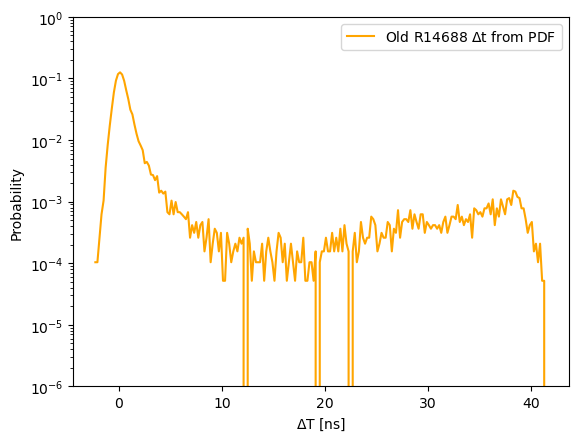

In [7]:
time_r14688_old=[-2.3, -2.1, -1.9, -1.7, -1.5, -1.3, -1.1, -0.9, -0.7, -0.5, -0.3, -0.1, 0.1, 0.3, 0.5, 0.7, 0.9, 1.1, 1.3, 1.5, 1.7, 1.9, 2.1, 2.3, 2.5, 2.7, 2.9, 3.1, 3.3, 3.5, 3.7, 3.9, 4.1, 4.3, 4.5, 4.7, 4.9, 5.1, 5.3, 5.5, 5.7, 5.9, 6.1, 6.3, 6.5, 6.7, 6.9, 7.1, 7.3, 7.5, 7.7, 7.9, 8.1, 8.3, 8.5, 8.7, 8.9, 9.1, 9.3, 9.5, 9.7, 9.9, 10.1, 10.3, 10.5, 10.7, 10.9, 11.1, 11.3, 11.5, 11.7, 11.9, 12.1, 12.3, 12.5, 12.7, 12.9, 13.1, 13.3, 13.5, 13.7, 13.9, 14.1, 14.3, 14.5, 14.7, 14.9, 15.1, 15.3, 15.5, 15.7, 15.9, 16.1, 16.3, 16.5, 16.7, 16.9, 17.1, 17.3, 17.5, 17.7, 17.9, 18.1, 18.3, 18.5, 18.7, 18.9, 19.1, 19.3, 19.5, 19.7, 19.9, 20.1, 20.3, 20.5, 20.7, 20.9, 21.1, 21.3, 21.5, 21.7, 21.9, 22.1, 22.3, 22.5, 22.7, 22.9, 23.1, 23.3, 23.5, 23.7, 23.9, 24.1, 24.3, 24.5, 24.7, 24.9, 25.1, 25.3, 25.5, 25.7, 25.9, 26.1, 26.3, 26.5, 26.7, 26.9, 27.1, 27.3, 27.5, 27.7, 27.9, 28.1, 28.3, 28.5, 28.7, 28.9, 29.1, 29.3, 29.5, 29.7, 29.9, 30.1, 30.3, 30.5, 30.7, 30.9, 31.1, 31.3, 31.5, 31.7, 31.9, 32.1, 32.3, 32.5, 32.7, 32.9, 33.1, 33.3, 33.5, 33.7, 33.9, 34.1, 34.3, 34.5, 34.7, 34.9, 35.1, 35.3, 35.5, 35.7, 35.9, 36.1, 36.3, 36.5, 36.7, 36.9, 37.1, 37.3, 37.5, 37.7, 37.9, 38.1, 38.3, 38.5, 38.7, 38.9, 39.1, 39.3, 39.5, 39.7, 39.9, 40.1, 40.3, 40.5, 40.7, 40.9, 41.1, 41.3, 41.5]
prob_r14688_old=[ 0.000103852944231, 0.000103852944231, 0.000259632360577, 0.000623117665386, 0.00103852944231, 0.00358292657597, 0.00830823553848, 0.017083809326, 0.0325578980164, 0.059351957628, 0.092169488005, 0.117561532869, 0.125558209575, 0.115796032818, 0.0913905909233, 0.064284972479, 0.046318413127, 0.0311039567972, 0.026067089002, 0.0178107799356, 0.0126700591962, 0.00955447086925, 0.00815245612213, 0.00685429431924, 0.00420604424135, 0.00441375012982, 0.00384255893655, 0.00275210302212, 0.00270017655001, 0.00223283830097, 0.00259632360577, 0.00140201474712, 0.00150586769135, 0.001350088275, 0.00145394121923, 0.000675044137501, 0.000623117665386, 0.00103852944231, 0.000623117665386, 0.000986602970194, 0.000675044137501, 0.000675044137501, 0.000623117665386, 0.00057119119327, 0.000519264721155, 0.000675044137501, 0.000259632360577, 0.000415411776924, 0.000311558832693, 0.000467338249039, 0.000259632360577, 0.000415411776924, 0.000467338249039, 0.000155779416346, 0.000259632360577, 0.000519264721155, 0.000103852944231, 0.000207705888462, 0.000363485304808, 0.000311558832693, 0.000155779416346, 0.000311558832693, 5.19264721155e-05, 5.19264721155e-05, 0.000311558832693, 0.000207705888462, 0.000103852944231, 0.000155779416346, 0.000207705888462, 0.000155779416346, 0.000259632360577, 0.000207705888462, 0.000259632360577, 0.0, 0.000363485304808, 0.000207705888462, 5.19264721155e-05, 0.000155779416346, 0.000103852944231, 0.000103852944231, 0.000103852944231, 0.000207705888462, 5.19264721155e-05, 0.000155779416346, 0.000259632360577, 0.000155779416346, 0.000103852944231, 5.19264721155e-05, 0.000155779416346, 0.000311558832693, 0.000259632360577, 0.000103852944231, 0.000207705888462, 5.19264721155e-05, 0.000103852944231, 0.000207705888462, 0.000103852944231, 5.19264721155e-05, 0.000155779416346, 0.000103852944231, 0.000103852944231, 0.000259632360577, 5.19264721155e-05, 5.19264721155e-05, 0.000103852944231, 0.000103852944231, 5.19264721155e-05, 0.000155779416346, 0.0, 0.000103852944231, 0.000155779416346, 0.000155779416346, 0.000259632360577, 0.000155779416346, 0.000155779416346, 0.000311558832693, 0.000155779416346, 0.000259632360577, 0.000155779416346, 0.000363485304808, 0.000155779416346, 0.000415411776924, 0.000207705888462, 0.000155779416346, 0.0, 0.000155779416346, 0.000311558832693, 0.000103852944231, 0.000155779416346, 0.000467338249039, 0.000259632360577, 0.000207705888462, 0.000259632360577, 0.000259632360577, 0.00057119119327, 0.000519264721155, 0.000415411776924, 0.000155779416346, 0.000207705888462, 0.000311558832693, 0.000259632360577, 0.000259632360577, 0.000467338249039, 0.000415411776924, 0.000155779416346, 0.000363485304808, 0.000311558832693, 0.000726970609617, 0.000259632360577, 0.000467338249039, 0.000519264721155, 0.000519264721155, 0.000467338249039, 0.000726970609617, 0.000363485304808, 0.000623117665386, 0.000467338249039, 0.000363485304808, 0.000623117665386, 0.000623117665386, 0.000311558832693, 0.000467338249039, 0.000415411776924, 0.000363485304808, 0.000415411776924, 0.000415411776924, 0.000363485304808, 0.000415411776924, 0.000311558832693, 0.000467338249039, 0.00057119119327, 0.000311558832693, 0.000415411776924, 0.00057119119327, 0.00057119119327, 0.000519264721155, 0.000882750025963, 0.000467338249039, 0.00057119119327, 0.000415411776924, 0.000519264721155, 0.000467338249039, 0.000623117665386, 0.000259632360577, 0.000778897081732, 0.000726970609617, 0.000623117665386, 0.000675044137501, 0.00057119119327, 0.000778897081732, 0.000778897081732, 0.000934676498079, 0.000623117665386, 0.00109045591443, 0.000415411776924, 0.000778897081732, 0.00057119119327, 0.00109045591443, 0.000830823553848, 0.000623117665386, 0.00109045591443, 0.00114238238654, 0.000882750025963, 0.00150586769135, 0.00145394121923, 0.00119430885866, 0.00114238238654, 0.000778897081732, 0.000778897081732, 0.000519264721155, 0.000311558832693, 0.000415411776924, 0.000467338249039, 0.000155779416346, 0.000207705888462, 0.000103852944231, 0.000207705888462, 5.19264721155e-05, 5.19264721155e-05, 0.0]
sum=0
for i in prob_r7081_old:
    sum+=i*0.1 #multiply by bin width
print('Sum of probability is',sum)

plt.plot(time_r14688_old,prob_r14688_old,label='Old R14688 $\Delta$t from PDF',color='orange')
plt.ylabel('Probability')
plt.xlabel('$\Delta$T [ns]')
plt.yscale('log')
plt.legend()
plt.ylim(1e-6,1)
